In [17]:
!pip install faker

# Task
Generate Python code and Jupyter notebooks for anomaly detection in bank transactions using Agentic AI. The process should include generating a synthetic dataset with anomalies and missing values, preprocessing the data, engineering relevant features (Geolocation & Country, Device & channel, Customer behaviour, Risk Flags, Time Window Aggregates), detecting anomalies using LSTM Autoencoder and Isolation Forest, explaining anomalies with SHAP, and generating adaptive rules. Each phase should have a dedicated notebook with code, sample data in tabular form, and appropriate graphs.

## Generate bank transaction dataset

### Subtask:
Create a synthetic dataset with the specified columns, including anomalies, nulls, empty, and missing values. Ensure data types are correct and generate relevant graphs to visualize the dataset characteristics.


**Reasoning**:
The first step is to define the structure and generate a synthetic dataset with specified columns, including anomalies, nulls, empty, and missing values, and then display the first few rows and the data types to verify the creation.



In [18]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker()

num_transactions = 10000

data = {
    'transaction_id': [fake.uuid4() for _ in range(num_transactions)],
    'customer_id': [fake.uuid4() for _ in range(num_transactions)],
    'transaction_amount': [round(random.uniform(1, 5000), 2) for _ in range(num_transactions)],
    'transaction_time': [fake.date_time_between(start_date='-1y', end_date='now') for _ in range(num_transactions)],
    'merchant_id': [fake.uuid4() for _ in range(num_transactions)],
    'device_id': [fake.uuid4() for _ in range(num_transactions)],
    'location': [fake.city() for _ in range(num_transactions)],
    'country': [fake.country() for _ in range(num_transactions)],
    'payment_method': [random.choice(['credit_card', 'debit_card', 'paypal', 'bank_transfer']) for _ in range(num_transactions)],
    'transaction_type': [random.choice(['purchase', 'withdrawal', 'deposit', 'transfer']) for _ in range(num_transactions)],
    'customer_age': [random.randint(18, 80) for _ in range(num_transactions)],
    'customer_account_age_days': [random.randint(1, 3650) for _ in range(num_transactions)],
    'customer_device_os': [random.choice(['Windows', 'macOS', 'Linux', 'Android', 'iOS']) for _ in range(num_transactions)],
    'customer_ip_address': [fake.ipv4_public() for _ in range(num_transactions)],
    'transaction_status': [random.choice(['completed', 'failed', 'pending']) for _ in range(num_transactions)]
}

df = pd.DataFrame(data)

# Introduce anomalies
# Anomaly 1: Unusually large transaction amounts
num_large_anomalies = int(num_transactions * 0.01)
large_anomaly_indices = np.random.choice(df.index, num_large_anomalies, replace=False)
df.loc[large_anomaly_indices, 'transaction_amount'] = [round(random.uniform(10000, 100000), 2) for _ in range(num_large_anomalies)]

# Anomaly 2: Transactions from unusual locations (e.g., different country than customer country which we don't have, so just unusual city)
num_location_anomalies = int(num_transactions * 0.01)
location_anomaly_indices = np.random.choice(df.index, num_location_anomalies, replace=False)
df.loc[location_anomaly_indices, 'location'] = [fake.city() for _ in range(num_location_anomalies)]

# Anomaly 3: Transactions at unusual times (e.g., late night for majority of customers if we had that data, simulating simply random unusual times)
num_time_anomalies = int(num_transactions * 0.01)
time_anomaly_indices = np.random.choice(df.index, num_time_anomalies, replace=False)
df.loc[time_anomaly_indices, 'transaction_time'] = [fake.date_time_between(start_date='-1y', end_date='now') for _ in range(num_time_anomalies)] # Faker already generates random times, hard to simulate 'unusual' without customer profiles

# Introduce null, empty, and missing values
num_nulls = int(num_transactions * 0.05)
for col in ['transaction_amount', 'location', 'device_id', 'payment_method', 'customer_age']:
    null_indices = np.random.choice(df.index, num_nulls, replace=False)
    df.loc[null_indices, col] = np.nan

num_empty_strings = int(num_transactions * 0.02)
for col in ['country', 'transaction_type']:
    empty_indices = np.random.choice(df.index, num_empty_strings, replace=False)
    df.loc[empty_indices, col] = ''

# Convert transaction_time to datetime objects
df['transaction_time'] = pd.to_datetime(df['transaction_time'])


display(df.head())
display(df.info())

,transaction_id,customer_id,transaction_amount,transaction_time,merchant_id,device_id,location,country,payment_method,transaction_type,customer_age,customer_account_age_days,customer_device_os,customer_ip_address,transaction_status
0,4fb99843-cd7a-498a-b645-f4ba1779878a,d280bca1-fef7-436f-9282-87482b0976f6,2391.16,2025-05-05 00:43:33.535987,79a5204d-0c26-4ad7-85cf-e0bbfa78e6f5,9c1778aa-c029-4039-95d2-1128af036d04,Lake Howard,Hungary,NaN,transfer,75.0,1485,macOS,197.15.159.79,pending
1,dc0c94ff-07cc-4e4c-a26f-17ace0d865ac,1619bdbc-0c1a-4bc7-9aef-58d3100bd884,3566.03,2024-07-13 16:26:05.782137,c0e8eb2b-79c4-4149-9701-543dd1b0dc31,e0e1e179-f2ce-400c-ae6f-35bf37ebf3a7,South Ryan,Suriname,paypal,withdrawal,28.0,166,Linux,24.139.88.169,pending
2,50a85518-0dc0-47c6-bcb6-5bd5898042b0,abd9dd32-d71c-4477-99f4-04b5513b9d6a,4245.42,2025-01-16 11:40:49.688497,765cd92a-d9a6-4cbe-b569-5e5f26e5ada1,bcb27bc5-d31b-4f25-bfd3-b3a82c4f0cf0,East Chadton,Korea,NaN,deposit,78.0,1175,Windows,200.207.40.152,pending
3,3cf900d5-4843-4d61-83f9-7c7bd0c94012,4f0daf83-1b99-4424-be57-717019b4f658,2915.67,2025-02-19 02:13:20.273355,705fbf3e-7e77-4065-b3a3-e7d37ae5f038,c6b295d5-f04d-4a37-967b-df1a28c7a013,Makaylafort,American Samoa,credit_card,deposit,30.0,1434,Linux,180.255.82.147,completed
4,ecaa82b1-448a-4be2-b1d9-344c946f0ba7,a8c29fc3-8d52-46b7-8fe9-35ac54565c01,3615.76,2024-12-10 18:45:24.272531,8bb02ca7-f35c-4f85-bb7d-81f98e6d5430,14af6d03-62a5-41e1-af1c-e2d9addd1bd6,North Paulton,Bulgaria,credit_card,purchase,40.0,1827,iOS,124.242.103.235,pending


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   transaction_id             10000 non-null  object        
 1   customer_id                10000 non-null  object        
 2   transaction_amount         9500 non-null   float64       
 3   transaction_time           10000 non-null  datetime64[ns]
 4   merchant_id                10000 non-null  object        
 5   device_id                  9500 non-null   object        
 6   location                   9500 non-null   object        
 7   country                    10000 non-null  object        
 8   payment_method             9500 non-null   object        
 9   transaction_type           10000 non-null  object        
 10  customer_age               9500 non-null   float64       
 11  customer_account_age_days  10000 non-null  int64         
 12  custo

None

**Reasoning**:
The previous command failed because the `faker` library is not installed. I need to install the `faker` library before proceeding with the data generation.



In [19]:
%pip install faker

**Reasoning**:
Now that `faker` is installed, I can re-execute the code to generate the synthetic dataset with the specified columns, including anomalies, nulls, empty, and missing values, and then display the first few rows and the data types to verify the creation.



In [20]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker()

num_transactions = 10000

data = {
    'transaction_id': [fake.uuid4() for _ in range(num_transactions)],
    'customer_id': [fake.uuid4() for _ in range(num_transactions)],
    'transaction_amount': [round(random.uniform(1, 5000), 2) for _ in range(num_transactions)],
    'transaction_time': [fake.date_time_between(start_date='-1y', end_date='now') for _ in range(num_transactions)],
    'merchant_id': [fake.uuid4() for _ in range(num_transactions)],
    'device_id': [fake.uuid4() for _ in range(num_transactions)],
    'location': [fake.city() for _ in range(num_transactions)],
    'country': [fake.country() for _ in range(num_transactions)],
    'payment_method': [random.choice(['credit_card', 'debit_card', 'paypal', 'bank_transfer']) for _ in range(num_transactions)],
    'transaction_type': [random.choice(['purchase', 'withdrawal', 'deposit', 'transfer']) for _ in range(num_transactions)],
    'customer_age': [random.randint(18, 80) for _ in range(num_transactions)],
    'customer_account_age_days': [random.randint(1, 3650) for _ in range(num_transactions)],
    'customer_device_os': [random.choice(['Windows', 'macOS', 'Linux', 'Android', 'iOS']) for _ in range(num_transactions)],
    'customer_ip_address': [fake.ipv4_public() for _ in range(num_transactions)],
    'transaction_status': [random.choice(['completed', 'failed', 'pending']) for _ in range(num_transactions)]
}

df = pd.DataFrame(data)

# Introduce anomalies
# Anomaly 1: Unusually large transaction amounts
num_large_anomalies = int(num_transactions * 0.01)
large_anomaly_indices = np.random.choice(df.index, num_large_anomalies, replace=False)
df.loc[large_anomaly_indices, 'transaction_amount'] = [round(random.uniform(10000, 100000), 2) for _ in range(num_large_anomalies)]

# Anomaly 2: Transactions from unusual locations (e.g., different country than customer country which we don't have, so just unusual city)
num_location_anomalies = int(num_transactions * 0.01)
location_anomaly_indices = np.random.choice(df.index, num_location_anomalies, replace=False)
df.loc[location_anomaly_indices, 'location'] = [fake.city() for _ in range(num_location_anomalies)]

# Anomaly 3: Transactions at unusual times (e.g., late night for majority of customers if we had that data, simulating simply random unusual times)
num_time_anomalies = int(num_transactions * 0.01)
time_anomaly_indices = np.random.choice(df.index, num_time_anomalies, replace=False)
df.loc[time_anomaly_indices, 'transaction_time'] = [fake.date_time_between(start_date='-1y', end_date='now') for _ in range(num_time_anomalies)] # Faker already generates random times, hard to simulate 'unusual' without customer profiles

# Introduce null, empty, and missing values
num_nulls = int(num_transactions * 0.05)
for col in ['transaction_amount', 'location', 'device_id', 'payment_method', 'customer_age']:
    null_indices = np.random.choice(df.index, num_nulls, replace=False)
    df.loc[null_indices, col] = np.nan

num_empty_strings = int(num_transactions * 0.02)
for col in ['country', 'transaction_type']:
    empty_indices = np.random.choice(df.index, num_empty_strings, replace=False)
    df.loc[empty_indices, col] = ''

# Convert transaction_time to datetime objects
df['transaction_time'] = pd.to_datetime(df['transaction_time'])


display(df.head())
display(df.info())

,transaction_id,customer_id,transaction_amount,transaction_time,merchant_id,device_id,location,country,payment_method,transaction_type,customer_age,customer_account_age_days,customer_device_os,customer_ip_address,transaction_status
0,5fea9520-2bcd-49c2-9d86-579bf0d5cffe,60007c4d-ff02-4a56-8381-6ecac58b199c,4901.48,2025-04-09 23:21:39.401366,314b2e33-2077-4a2d-ac01-bd6bae4b6e8b,8691835e-0ea9-4f71-82a7-c1c64d09471c,Kevinville,Tanzania,debit_card,withdrawal,18.0,56,iOS,174.101.89.70,pending
1,e0325b64-bbbd-4bb3-be6c-ea9502d643c5,b4571ebb-3b43-4b20-84ac-1a00e3ec58ce,4825.31,2024-09-27 23:23:05.335274,d7b3ab8f-6cbd-44a6-a406-719d8aca9539,a4d7f0e4-3bab-4923-a69a-bd75542f85f3,NaN,Liberia,debit_card,withdrawal,NaN,778,Android,147.118.154.166,completed
2,b6c22c8f-fb96-4ffc-a6a0-5b1d09fe5fb9,c4155465-3f44-46ea-85c9-9df0305191ac,1843.97,2024-08-31 17:08:09.336295,8dd612c7-af60-4964-af19-1159a6ea9d72,34e59706-7aa3-4209-bf40-932c16682903,Scottstad,Vietnam,bank_transfer,withdrawal,68.0,295,Linux,107.127.201.34,completed
3,d3068c39-16fb-49bf-8beb-943ddaa2e357,126d64de-0a5c-48ba-a7f2-33acc0dd24dc,1262.40,2024-12-30 14:35:34.686060,1aed5463-174a-4d44-9d84-8f5405193abd,57e53000-9dd3-4f06-b37d-6b0a45c15e89,Latoyahaven,Pitcairn Islands,debit_card,purchase,68.0,2309,Windows,136.87.9.162,pending
4,3467b89b-ee1c-4dd8-be87-0053d7a72ba8,acf22638-7f78-410d-bf85-6b9f277b6229,NaN,2025-06-18 16:13:10.060191,5a5ada5b-fe64-442c-92ca-8100122b2b9f,f3bb602b-96e4-475c-ba13-e013edd4a821,Dawnhaven,French Polynesia,paypal,transfer,69.0,3230,macOS,201.193.155.167,pending


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   transaction_id             10000 non-null  object        
 1   customer_id                10000 non-null  object        
 2   transaction_amount         9500 non-null   float64       
 3   transaction_time           10000 non-null  datetime64[ns]
 4   merchant_id                10000 non-null  object        
 5   device_id                  9500 non-null   object        
 6   location                   9500 non-null   object        
 7   country                    10000 non-null  object        
 8   payment_method             9500 non-null   object        
 9   transaction_type           10000 non-null  object        
 10  customer_age               9500 non-null   float64       
 11  customer_account_age_days  10000 non-null  int64         
 12  custo

None

**Reasoning**:
Now that the dataset is generated, I need to generate basic descriptive statistics for the dataset to understand its characteristics and create visualizations for key columns to visualize data distributions and the presence of anomalies, as per the instructions.



,transaction_amount,transaction_time,customer_age,customer_account_age_days
count,9500.000000,10000,9500.000000,10000.000000
mean,2997.360295,2025-01-07 22:08:48.065125632,48.848526,1826.772400
min,1.350000,2024-07-10 03:49:11.682062,18.000000,1.000000
25%,1295.797500,2024-10-08 10:24:47.483800832,33.000000,926.000000
50%,2560.495000,2025-01-07 00:50:49.267869952,49.000000,1811.000000
75%,3780.645000,2025-04-08 02:58:53.834228480,65.000000,2741.250000
max,96830.600000,2025-07-10 08:19:38.394208,80.000000,3650.000000
std,5846.236927,NaN,18.160266,1053.889403


,0
transaction_id,0
customer_id,0
transaction_amount,500
transaction_time,0
merchant_id,0
device_id,500
location,500
country,0
payment_method,500
transaction_type,0


,0
transaction_id,0
customer_id,0
transaction_amount,0
transaction_time,0
merchant_id,0
device_id,0
location,0
country,200
payment_method,0
transaction_type,200


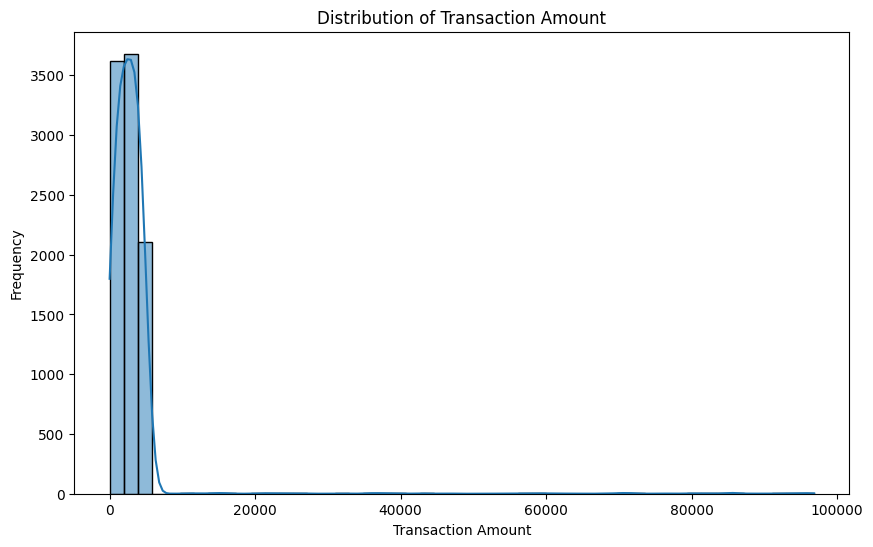

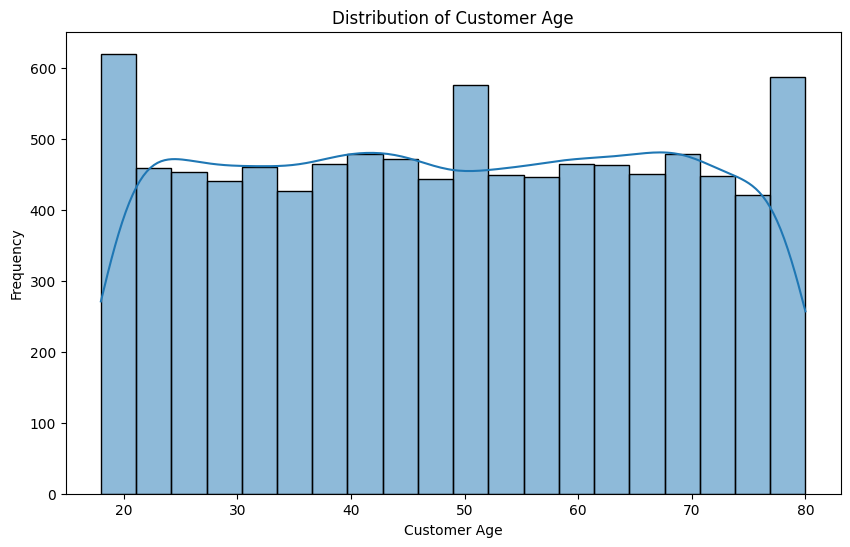

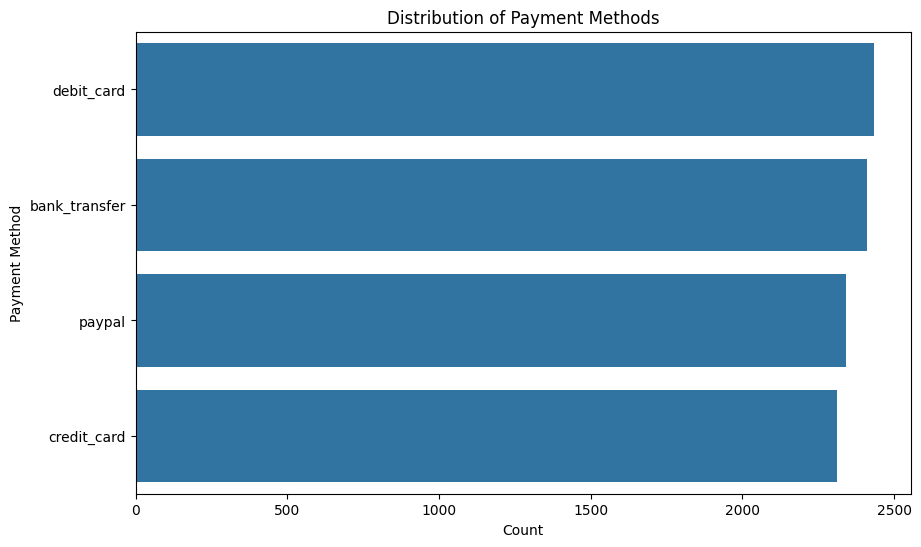

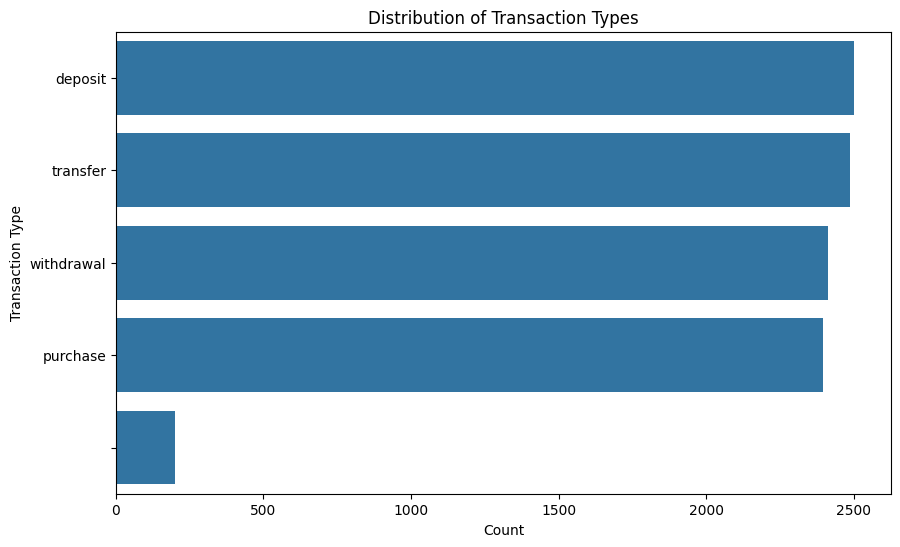

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic descriptive statistics
display(df.describe())

# Check for null and empty values
display(df.isnull().sum())
display(df.apply(lambda x: (x == '').sum()))

# Visualize transaction amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['transaction_amount'].dropna(), bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Visualize customer age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['customer_age'].dropna(), bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

# Visualize distribution of payment methods
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='payment_method', order=df['payment_method'].value_counts().index)
plt.title('Distribution of Payment Methods')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.show()

# Visualize distribution of transaction types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='transaction_type', order=df['transaction_type'].value_counts().index)
plt.title('Distribution of Transaction Types')
plt.xlabel('Count')
plt.ylabel('Transaction Type')
plt.show()

## Data preprocessing

### Subtask:
Develop Python code to handle missing values, empty strings, and other data cleaning steps. Calculate and display preprocessing statistics in a tabular format and visualize data distributions after cleaning.


**Reasoning**:
Handle missing values and empty strings in the DataFrame and then display the remaining missing values and empty strings and visualize the distributions of key features.



Missing values before cleaning:


,0
transaction_id,0
customer_id,0
transaction_amount,500
transaction_time,0
merchant_id,0
device_id,500
location,500
country,0
payment_method,500
transaction_type,0



Empty strings before cleaning:


,0
transaction_id,0
customer_id,0
transaction_amount,0
transaction_time,0
merchant_id,0
device_id,0
location,0
country,200
payment_method,0
transaction_type,200



Missing values after cleaning:


,0
transaction_id,0
customer_id,0
transaction_amount,0
transaction_time,0
merchant_id,0
device_id,0
location,0
country,0
payment_method,0
transaction_type,0



Empty strings after cleaning:


,0
transaction_id,0
customer_id,0
transaction_amount,0
transaction_time,0
merchant_id,0
device_id,0
location,0
country,0
payment_method,0
transaction_type,0


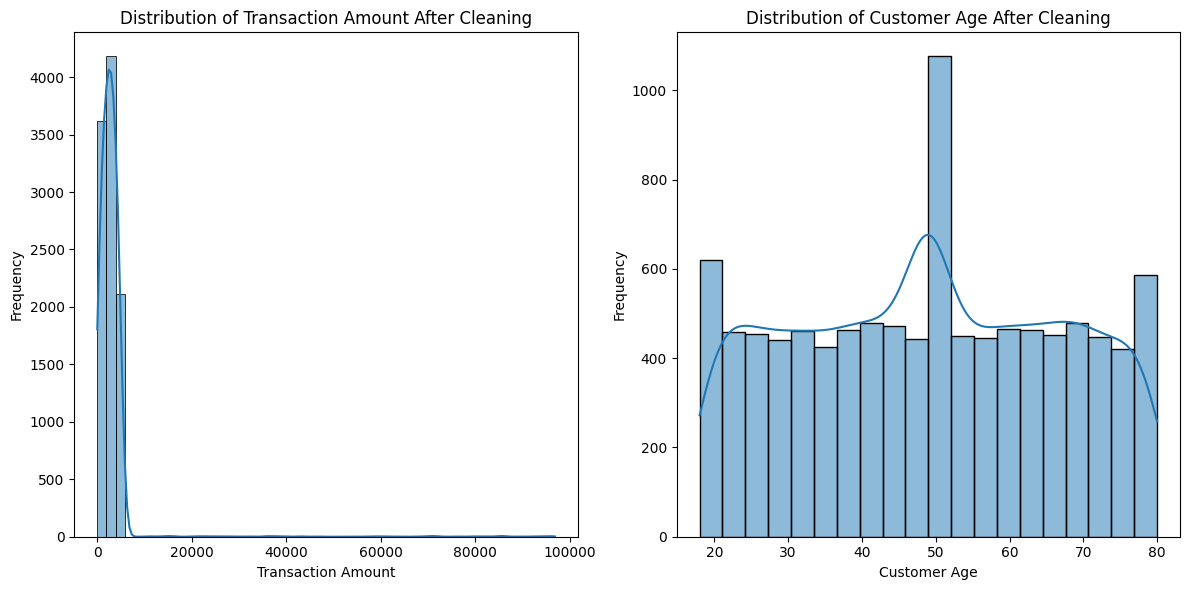

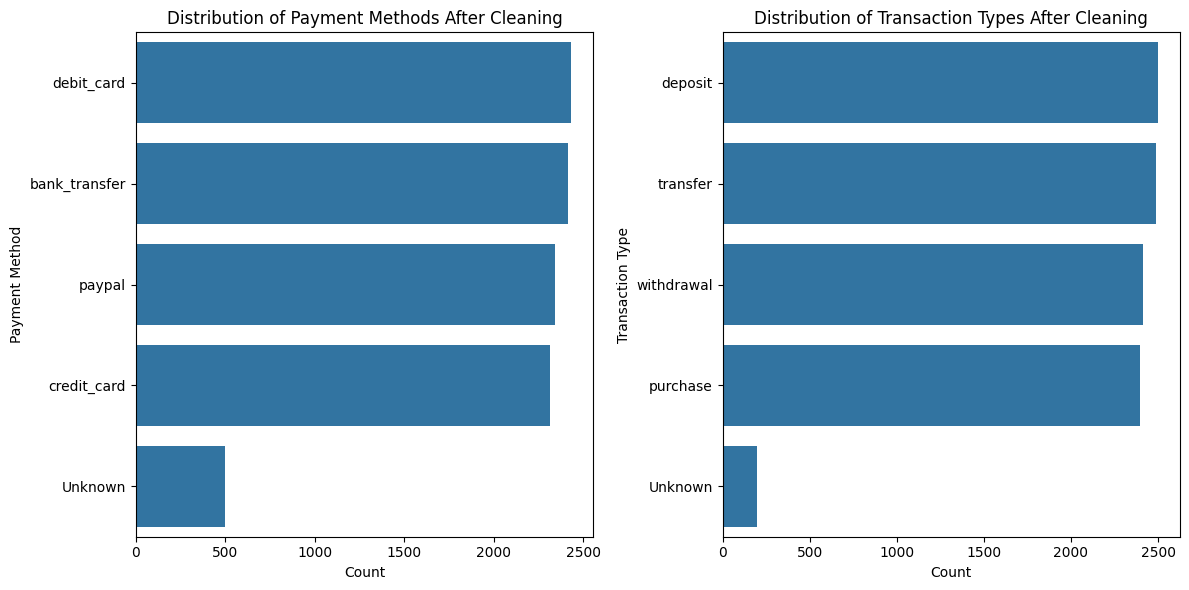

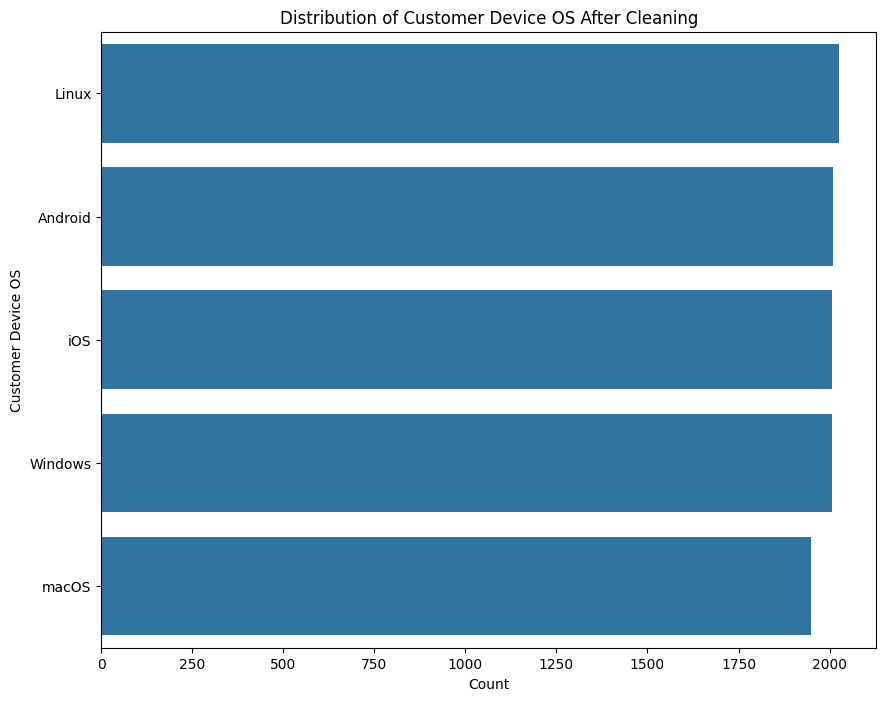

In [22]:
# Identify columns with missing values and empty strings
print("Missing values before cleaning:")
display(df.isnull().sum())
print("\nEmpty strings before cleaning:")
display(df.apply(lambda x: (x == '').sum()))

# Impute numerical columns with missing values using the median
numerical_cols_with_nulls = ['transaction_amount', 'customer_age']
for col in numerical_cols_with_nulls:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Replace missing values and empty strings in categorical columns with 'Unknown' or mode
categorical_cols_to_clean = ['location', 'device_id', 'payment_method', 'country', 'transaction_type']
for col in categorical_cols_to_clean:
    if df[col].isnull().any():
        df[col].fillna('Unknown', inplace=True)
    if (df[col] == '').any():
        df[col].replace('', 'Unknown', inplace=True)

# Calculate and display remaining missing values and empty strings
print("\nMissing values after cleaning:")
display(df.isnull().sum())
print("\nEmpty strings after cleaning:")
display(df.apply(lambda x: (x == '').sum()))

# Visualize distributions of key numerical features after cleaning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['transaction_amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount After Cleaning')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['customer_age'], bins=20, kde=True)
plt.title('Distribution of Customer Age After Cleaning')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualize distributions of key categorical features after cleaning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, y='payment_method', order=df['payment_method'].value_counts().index)
plt.title('Distribution of Payment Methods After Cleaning')
plt.xlabel('Count')
plt.ylabel('Payment Method')

plt.subplot(1, 2, 2)
sns.countplot(data=df, y='transaction_type', order=df['transaction_type'].value_counts().index)
plt.title('Distribution of Transaction Types After Cleaning')
plt.xlabel('Count')
plt.ylabel('Transaction Type')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='customer_device_os', order=df['customer_device_os'].value_counts().index)
plt.title('Distribution of Customer Device OS After Cleaning')
plt.xlabel('Count')
plt.ylabel('Customer Device OS')
plt.show()

## Feature engineering

### Subtask:
Implement Python code to create new features from the dataset, including Geolocation & Country Features, Device & channel features, Customer behaviour profiles, Risk Flags / Rule-based Features, and Time Window Aggregates. Display a sample of the dataset with the new features and visualize their distributions.


**Reasoning**:
Implement feature engineering steps as per the instructions, including creating geolocation, device/channel, customer behavior, risk flag, and time window aggregate features. Then display the head of the dataframe and visualize the distributions of some new features.



,transaction_id,customer_id,transaction_amount,transaction_time,merchant_id,device_id,location,country,payment_method,transaction_type,...,flag_unknown_payment_method,amount_sum_last_1h,transaction_count_last_1h,amount_mean_last_1h,amount_sum_last_24h,transaction_count_last_24h,amount_mean_last_24h,amount_sum_last_168h,transaction_count_last_168h,amount_mean_last_168h
9970,51cd89c1-3c11-4762-a62a-e752592fbb59,0005ebc1-d8ef-44a5-8e6a-a1aeae392c00,3538.53,2024-11-12 07:37:41.097429,d28dfd16-378e-48f5-98de-cfdcd4f1c2d4,5ebac826-51f1-4a3b-950e-2da0534970ae,Scottchester,Madagascar,credit_card,transfer,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7291,94ea235b-fd2a-4999-b630-241b69e14e65,00094521-88a1-4a29-b48f-0437a159edac,3055.25,2025-01-30 20:54:57.234506,e90d0e8b-cd67-407f-9b1d-71727f0e0729,95064cef-684a-4c18-a2e2-7d7e8f788888,North Michaelside,Guatemala,Unknown,deposit,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9615,4f907dd6-250f-4724-b78e-22b81b9b6e79,000a5cb6-5f76-4114-b84d-3f251b10e031,44.39,2025-03-24 02:36:35.993586,a0da84f6-ae0e-4b07-8c67-262eabe3fe1d,ce718560-0e33-42aa-8639-5f7460e5565b,West Lisa,Martinique,paypal,deposit,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319,7f8c01ac-4860-417c-96b0-afadb8ff002f,00153e28-6205-45bf-8d88-b9133b813d36,2664.06,2024-12-08 16:42:47.174137,4727a63c-f1ee-4b00-adf9-1c21f78bf550,5761eecc-ae91-4d71-9054-64802e60eb3d,Lake Danaville,Palau,debit_card,Unknown,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4628,95733f82-8321-4ee4-89f8-ed1312f93e52,0016fba8-3fb3-456a-ba3e-4c5fec34ee0e,4189.57,2024-11-14 04:58:33.721537,f12fd600-1b38-4667-8d05-a454f7ce56c8,d385d9f6-9607-415a-aede-51c0fbd2dd44,East Brettside,Lao People's Democratic Republic,credit_card,withdrawal,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


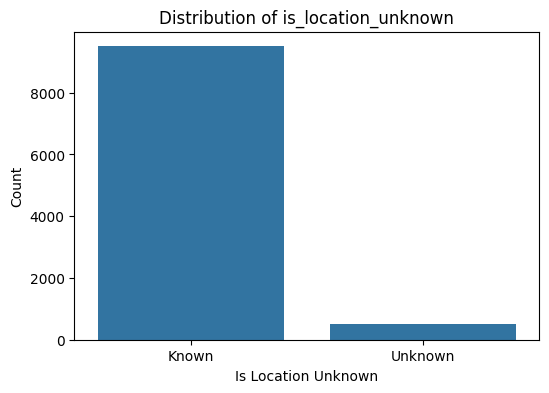

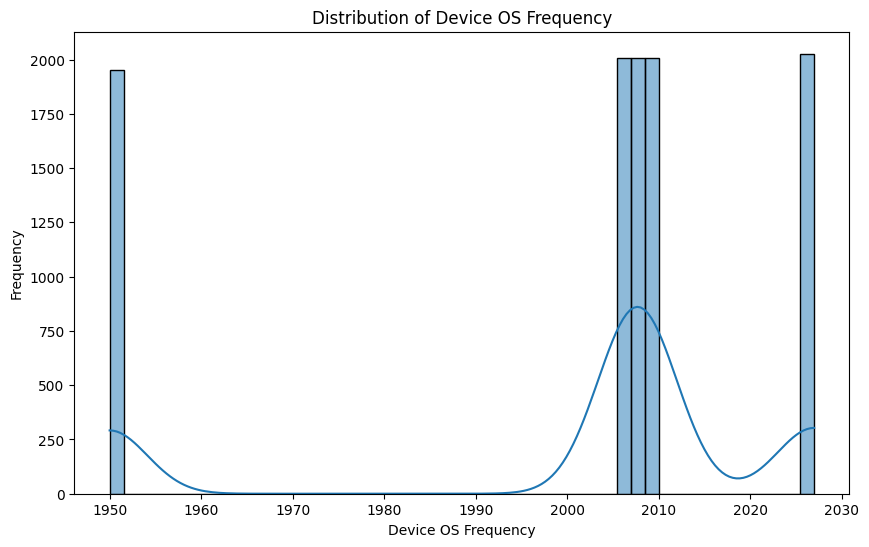

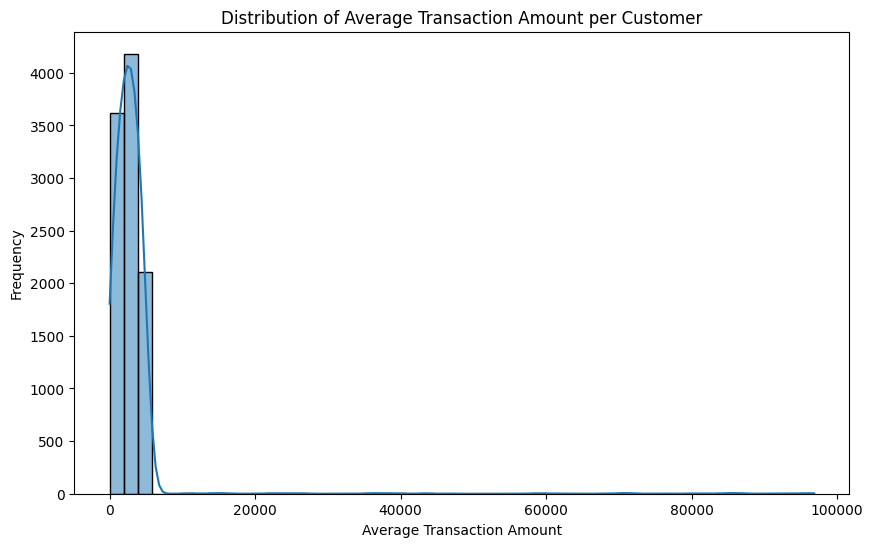

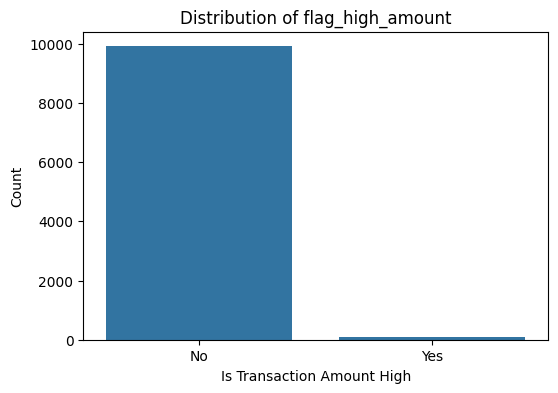

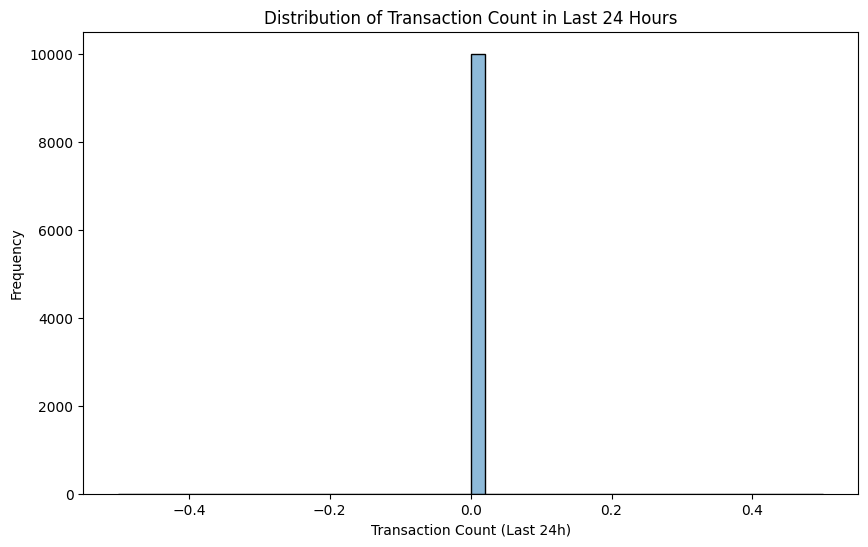

In [23]:
# 1. Create Geolocation features
# Simple feature: Whether the location is 'Unknown'
df['is_location_unknown'] = (df['location'] == 'Unknown').astype(int)
# Simple feature: Whether the country is 'Unknown'
df['is_country_unknown'] = (df['country'] == 'Unknown').astype(int)

# 2. Engineer Device and channel features
# Frequency encoding for customer_device_os
device_os_counts = df['customer_device_os'].value_counts()
df['device_os_freq'] = df['customer_device_os'].map(device_os_counts)
# Dummy variables for payment_method (handling 'Unknown' as a separate category)
payment_method_dummies = pd.get_dummies(df['payment_method'], prefix='payment')
df = pd.concat([df, payment_method_dummies], axis=1)

# 3. Develop Customer behaviour profiles
# Calculate aggregates for each customer
customer_agg = df.groupby('customer_id').agg(
    total_transaction_amount=('transaction_amount', 'sum'),
    average_transaction_amount=('transaction_amount', 'mean'),
    transaction_count=('transaction_id', 'count'),
    unique_payment_methods=('payment_method', lambda x: x.nunique())
).reset_index()

# Merge customer aggregates back to the main dataframe
df = pd.merge(df, customer_agg, on='customer_id', how='left')

# 4. Implement Risk Flags / Rule-based Features
# Flag for high transaction amount (using a threshold, e.g., 5000)
high_amount_threshold = 5000
df['flag_high_amount'] = (df['transaction_amount'] > high_amount_threshold).astype(int)
# Flag for transactions from unknown location or country
df['flag_unknown_location_country'] = ((df['location'] == 'Unknown') | (df['country'] == 'Unknown')).astype(int)
# Flag for failed transactions
df['flag_failed_transaction'] = (df['transaction_status'] == 'failed').astype(int)
# Flag for transactions with unknown payment method
df['flag_unknown_payment_method'] = (df['payment_method'] == 'Unknown').astype(int)

# 5. Generate Time Window Aggregates
# Ensure transaction_time is datetime and sorted for time window calculations
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df = df.sort_values(by=['customer_id', 'transaction_time'])

# Function to calculate time window features
def calculate_time_window_features(df, time_col, customer_id_col, amount_col, windows):
    df_sorted = df.sort_values(by=[customer_id_col, time_col])
    new_features = pd.DataFrame(index=df_sorted.index)

    for window in windows:
        window_td = timedelta(hours=window)
        # Use rolling window based on time difference for each customer
        rolling_window = df_sorted.groupby(customer_id_col).rolling(
            window=window_td,
            on=time_col,
            closed='left' # Look at transactions before the current one
        )

        # Sum of transaction amount in the window
        new_features[f'amount_sum_last_{window}h'] = rolling_window[amount_col].sum().reset_index(level=0, drop=True)
        # Count of transactions in the window
        new_features[f'transaction_count_last_{window}h'] = rolling_window[amount_col].count().reset_index(level=0, drop=True)
        # Mean of transaction amount in the window
        new_features[f'amount_mean_last_{window}h'] = rolling_window[amount_col].mean().reset_index(level=0, drop=True)

    # Fill NaN values created by rolling window (first transactions in a window) with 0
    new_features = new_features.fillna(0)

    return new_features

# Define time windows in hours
time_windows = [1, 24, 168] # 1 hour, 24 hours, 7 days (168 hours)

# Calculate time window features and merge with the main dataframe
time_window_features = calculate_time_window_features(
    df, 'transaction_time', 'customer_id', 'transaction_amount', time_windows
)
df = pd.concat([df, time_window_features], axis=1)

# Display the first few rows with new features
display(df.head())

# Visualize distributions of a selection of new features

# Geolocation feature
plt.figure(figsize=(6, 4))
sns.countplot(x='is_location_unknown', data=df)
plt.title('Distribution of is_location_unknown')
plt.xlabel('Is Location Unknown')
plt.ylabel('Count')
plt.xticks([0, 1], ['Known', 'Unknown'])
plt.show()

# Device/Channel feature (Frequency encoding)
plt.figure(figsize=(10, 6))
sns.histplot(df['device_os_freq'], bins=50, kde=True)
plt.title('Distribution of Device OS Frequency')
plt.xlabel('Device OS Frequency')
plt.ylabel('Frequency')
plt.show()

# Customer Behaviour feature
plt.figure(figsize=(10, 6))
sns.histplot(df['average_transaction_amount'], bins=50, kde=True)
plt.title('Distribution of Average Transaction Amount per Customer')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Risk Flag feature
plt.figure(figsize=(6, 4))
sns.countplot(x='flag_high_amount', data=df)
plt.title('Distribution of flag_high_amount')
plt.xlabel('Is Transaction Amount High')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Time Window Aggregate feature
plt.figure(figsize=(10, 6))
sns.histplot(df['transaction_count_last_24h'], bins=50, kde=True)
plt.title('Distribution of Transaction Count in Last 24 Hours')
plt.xlabel('Transaction Count (Last 24h)')
plt.ylabel('Frequency')
plt.show()

## Anomaly detection

### Subtask:
Write Python code using LSTM Autoencoder and Isolation Forest to identify anomalies. Visualize the results with graphs showing the distinction between normal and anomalous transactions.


**Reasoning**:
Select numerical features, normalize them, prepare data for LSTM Autoencoder, build and train the LSTM Autoencoder, calculate reconstruction errors, identify anomalies using reconstruction errors, train Isolation Forest, predict anomalies with Isolation Forest, combine results, add anomaly labels to the DataFrame, and visualize the results to show the distinction between normal and anomalous transactions.



Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - loss: 0.3105 - val_loss: 0.2560
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 0.2608 - val_loss: 0.2547
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.2473 - val_loss: 0.2105
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.2168 - val_loss: 0.2043
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1772 - val_loss: 0.1406
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.1440 - val_loss: 0.1389
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1429 - val_loss: 0.1385
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1423 - val_loss: 0.1380
Epoch 9/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1416 - val_loss: 0.1280
Epoch 10/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1277 - val_loss: 0.1139
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step

Anomaly counts:


,count
anomaly,
0,8238
1,1762


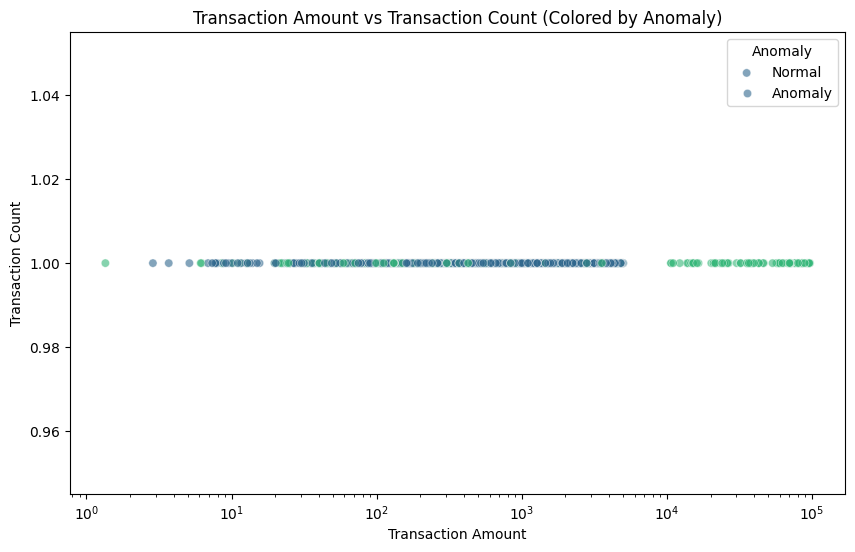

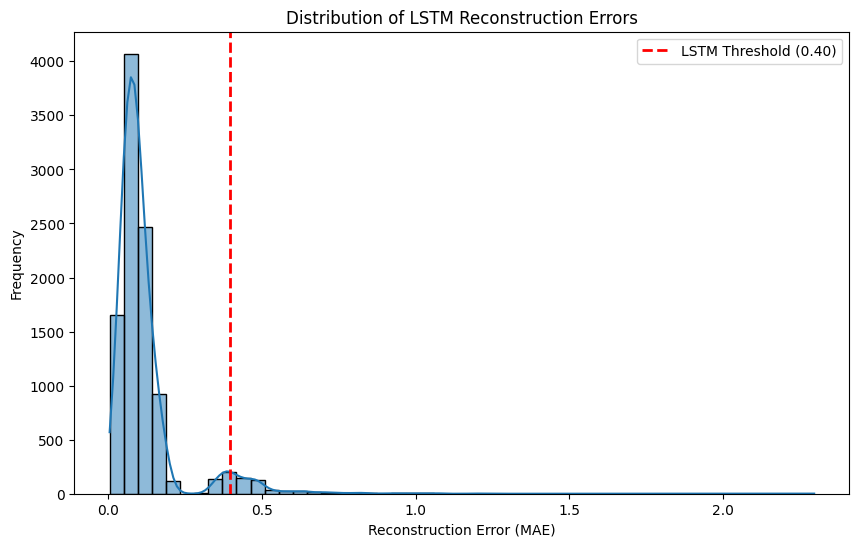

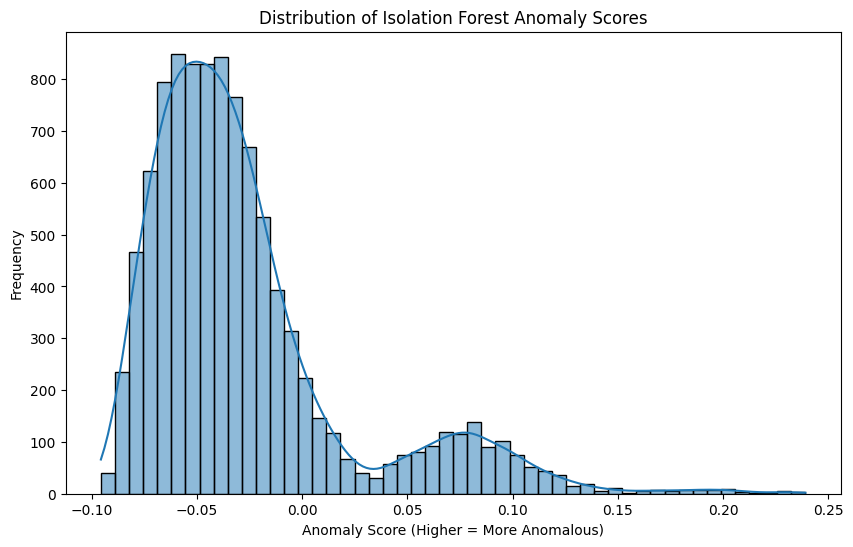

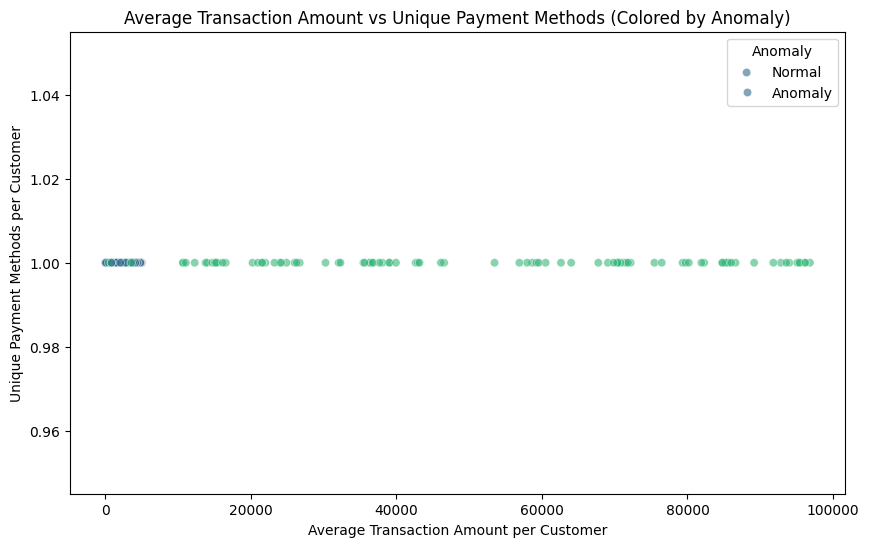

In [24]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Input
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Select the relevant numerical features for anomaly detection.
numerical_features = [
    'transaction_amount',
    'customer_age',
    'customer_account_age_days',
    'is_location_unknown',
    'is_country_unknown',
    'device_os_freq',
    'payment_bank_transfer',
    'payment_credit_card',
    'payment_debit_card',
    'payment_paypal',
    'payment_Unknown',
    'total_transaction_amount',
    'average_transaction_amount',
    'transaction_count',
    'unique_payment_methods',
    'flag_high_amount',
    'flag_unknown_location_country',
    'flag_failed_transaction',
    'flag_unknown_payment_method',
    'amount_sum_last_1h',
    'transaction_count_last_1h',
    'amount_mean_last_1h',
    'amount_sum_last_24h',
    'transaction_count_last_24h',
    'amount_mean_last_24h',
    'amount_sum_last_168h',
    'transaction_count_last_168h',
    'amount_mean_last_168h'
]

# Ensure all selected features exist in the dataframe
selected_features = [f for f in numerical_features if f in df.columns]
data_for_anomaly = df[selected_features]

# Handle potential infinite values after feature engineering (e.g., mean of zero division if count is 0)
data_for_anomaly = data_for_anomaly.replace([np.inf, -np.inf], np.nan)
# Impute any NaNs that might have been introduced by feature engineering (e.g., rolling window on first row)
# Use median imputation as it's less sensitive to outliers
for col in data_for_anomaly.columns:
    if data_for_anomaly[col].isnull().any():
        median_val = data_for_anomaly[col].median()
        data_for_anomaly[col].fillna(median_val, inplace=True)


# 2. Normalize the selected numerical features using StandardScaler.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_anomaly)
data_scaled_df = pd.DataFrame(data_scaled, columns=selected_features, index=df.index)

# 3. Prepare the data for the LSTM Autoencoder: Reshape the normalized data into a 3D format (samples, timesteps, features).
# For a simple Autoencoder without sequence dependency, we can treat each transaction as a single timestep.
timesteps = 1
X_lstm = data_scaled_df.values.reshape(-1, timesteps, len(selected_features))

# 4. Build the LSTM Autoencoder model using Keras/TensorFlow.
input_layer = Input(shape=(timesteps, len(selected_features)))
encoder = LSTM(128, activation='relu', return_sequences=True)(input_layer)
encoder = LSTM(64, activation='relu', return_sequences=False)(encoder)
latent_view = RepeatVector(timesteps)(encoder)
decoder = LSTM(64, activation='relu', return_sequences=True)(latent_view)
decoder = LSTM(128, activation='relu', return_sequences=True)(decoder)
output_layer = TimeDistributed(Dense(len(selected_features)))(decoder)

lstm_autoencoder = Model(inputs=input_layer, outputs=output_layer)

# 5. Compile the LSTM Autoencoder model.
lstm_autoencoder.compile(optimizer='adam', loss='mae')

# 6. Train the LSTM Autoencoder model on the normalized data.
# Using a small number of epochs for demonstration
history = lstm_autoencoder.fit(X_lstm, X_lstm, epochs=10, batch_size=32, validation_split=0.1, shuffle=False)

# 7. Calculate the reconstruction error for each transaction using the trained Autoencoder.
X_pred = lstm_autoencoder.predict(X_lstm)
# Calculate MAE for each transaction
reconstruction_errors = np.mean(np.abs(X_lstm - X_pred), axis=(1, 2))

# 8. Use the reconstruction error to identify anomalies (using a percentile threshold).
# Choose a percentile threshold (e.g., 95th percentile)
threshold_lstm = np.percentile(reconstruction_errors, 95)
df['anomaly_lstm'] = (reconstruction_errors > threshold_lstm).astype(int)

# 9. Instantiate and train an Isolation Forest model on the normalized data.
# contamination='auto' lets the algorithm decide, or specify a value (e.g., 'auto' or 0.05)
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
isolation_forest.fit(data_scaled)

# 10. Predict anomaly scores or labels for each transaction using the trained Isolation Forest model.
# predict returns -1 for outliers and 1 for inliers
anomaly_labels_if = isolation_forest.predict(data_scaled)
# Convert Isolation Forest labels (-1, 1) to (1, 0) for anomaly/normal
df['anomaly_isolation_forest'] = np.where(anomaly_labels_if == -1, 1, 0)

# 11. Combine the anomaly results from both models.
# Consider a transaction an anomaly if either model flags it
df['anomaly'] = df[['anomaly_lstm', 'anomaly_isolation_forest']].max(axis=1)

# 12. Add the anomaly labels (e.g., 0 for normal, 1 for anomaly) to the original DataFrame df.
# This was done in the previous step by creating the 'anomaly' column.

# Display the count of anomalies
print("\nAnomaly counts:")
display(df['anomaly'].value_counts())

# 13. Visualize the results.
# Scatter plot of transaction amount vs transaction count, colored by anomaly label
plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_amount', y='transaction_count', hue='anomaly', data=df, alpha=0.6, palette='viridis')
plt.title('Transaction Amount vs Transaction Count (Colored by Anomaly)')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Count')
plt.xscale('log') # Use log scale for amount due to large anomalies
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
plt.show()

# Histogram of reconstruction errors for LSTM, showing the threshold
plt.figure(figsize=(10, 6))
sns.histplot(reconstruction_errors, bins=50, kde=True)
plt.axvline(threshold_lstm, color='red', linestyle='dashed', linewidth=2, label=f'LSTM Threshold ({threshold_lstm:.2f})')
plt.title('Distribution of LSTM Reconstruction Errors')
plt.xlabel('Reconstruction Error (MAE)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Histogram of Isolation Forest anomaly scores (lower score = more anomalous)
# Convert decision_function output for visualization (lower is more anomalous, so negate it)
if_scores = isolation_forest.decision_function(data_scaled)
plt.figure(figsize=(10, 6))
sns.histplot(-if_scores, bins=50, kde=True)
plt.title('Distribution of Isolation Forest Anomaly Scores')
plt.xlabel('Anomaly Score (Higher = More Anomalous)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of average_transaction_amount vs unique_payment_methods, colored by anomaly label
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_transaction_amount', y='unique_payment_methods', hue='anomaly', data=df, alpha=0.6, palette='viridis')
plt.title('Average Transaction Amount vs Unique Payment Methods (Colored by Anomaly)')
plt.xlabel('Average Transaction Amount per Customer')
plt.ylabel('Unique Payment Methods per Customer')
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
plt.show()

## Anomaly explanation using shap

### Subtask:
Apply the SHAP algorithm to the detected anomalies to understand the reasons behind them. Generate appropriate plots to visualize feature importance for anomaly detection.


**Reasoning**:
Install the shap library if it is not already installed.



In [25]:
%pip install shap

**Reasoning**:
Select a subset of anomalous transactions, choose a SHAP explainer for the Isolation Forest model, calculate SHAP values for the selected subset, and generate a summary plot.



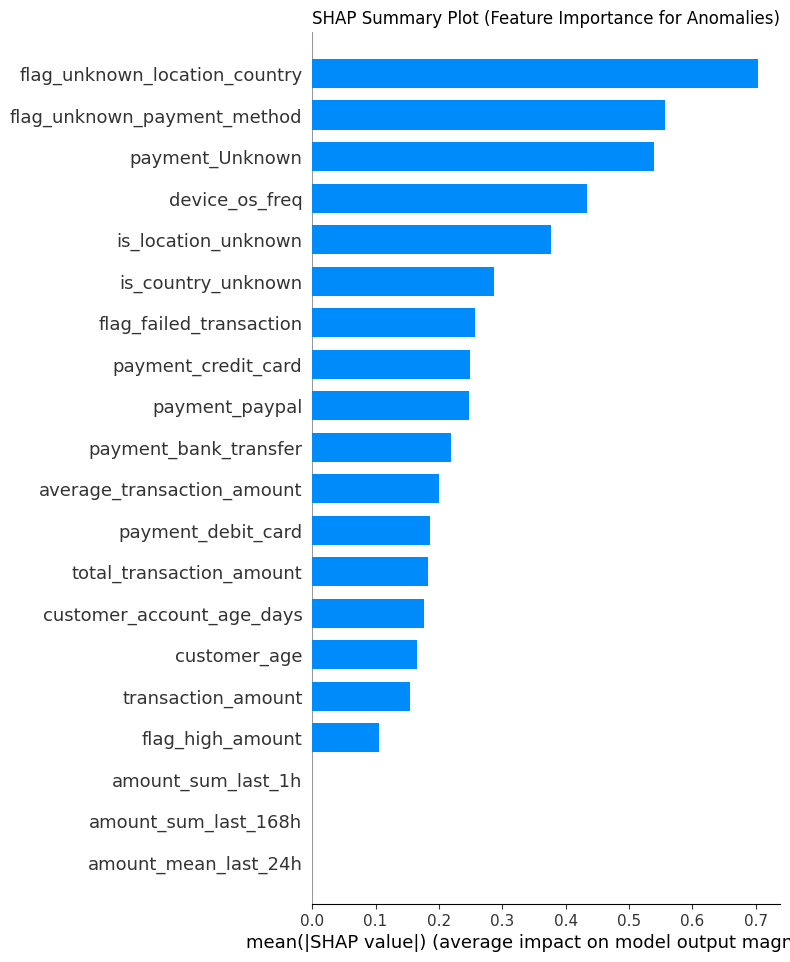

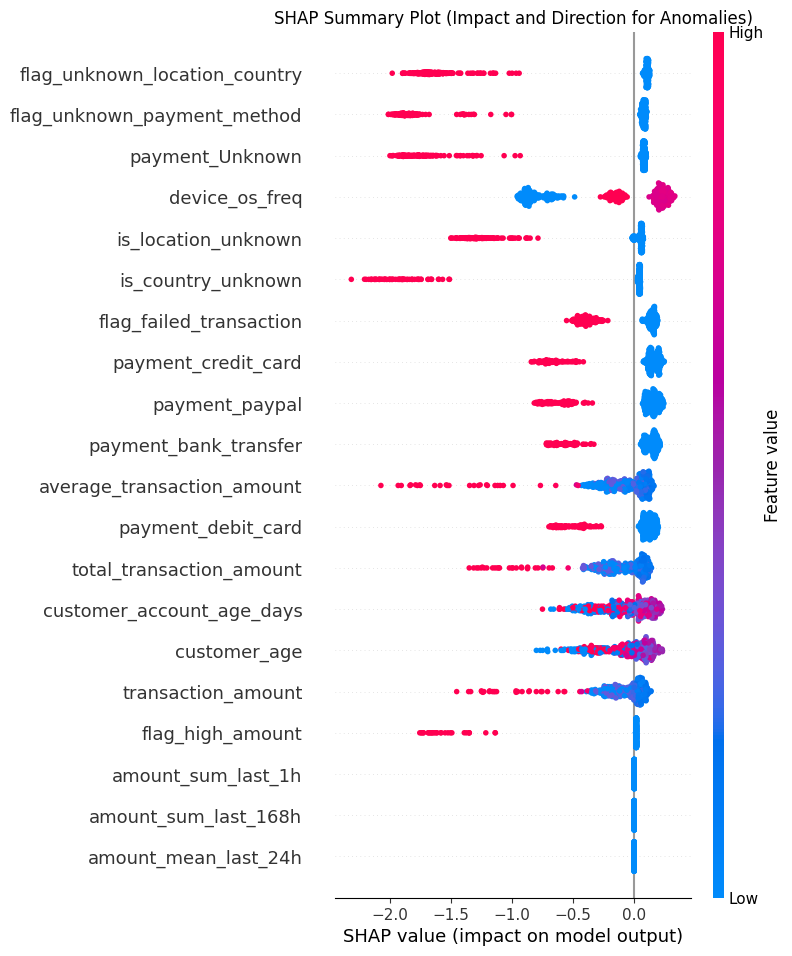

In [26]:
import shap

# 2. Select a subset of the anomalous transactions for SHAP analysis.
anomalies_df = df[df['anomaly'] == 1].copy()
# Use a sample of anomalies if there are too many
if len(anomalies_df) > 500: # Arbitrary limit for demonstration
    anomalies_sample = anomalies_df.sample(n=500, random_state=42)
else:
    anomalies_sample = anomalies_df

# Get the scaled data corresponding to the selected anomalous samples
anomalies_scaled = data_scaled_df.loc[anomalies_sample.index]

# 3. Choose a suitable SHAP explainer. Use TreeExplainer for Isolation Forest.
# The Isolation Forest model is already trained as `isolation_forest`
explainer = shap.TreeExplainer(isolation_forest)

# 4. Calculate SHAP values for the selected anomalous instances.
shap_values = explainer.shap_values(anomalies_scaled)

# 5. Generate a summary plot to visualize the feature importance.
# Use the data_scaled_df as the background dataset for the explainer for better interpretation
shap.summary_plot(shap_values, anomalies_scaled, plot_type="bar", show=False)
plt.title("SHAP Summary Plot (Feature Importance for Anomalies)")
plt.show()

shap.summary_plot(shap_values, anomalies_scaled, show=False)
plt.title("SHAP Summary Plot (Impact and Direction for Anomalies)")
plt.show()

**Reasoning**:
Generate force plots for individual anomalous transactions and dependence plots for key features to further understand the SHAP analysis results.



Generating SHAP force plots for individual anomalies:

Force plot for transaction index: 6940



Force plot for transaction index: 7248



Force plot for transaction index: 5168



Force plot for transaction index: 6338



Force plot for transaction index: 693



Generating SHAP dependence plots for key features:

Dependence plot for feature: transaction_amount


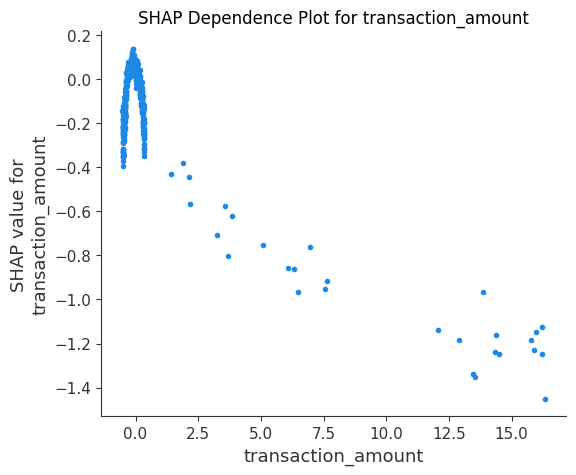


Dependence plot for feature: transaction_count


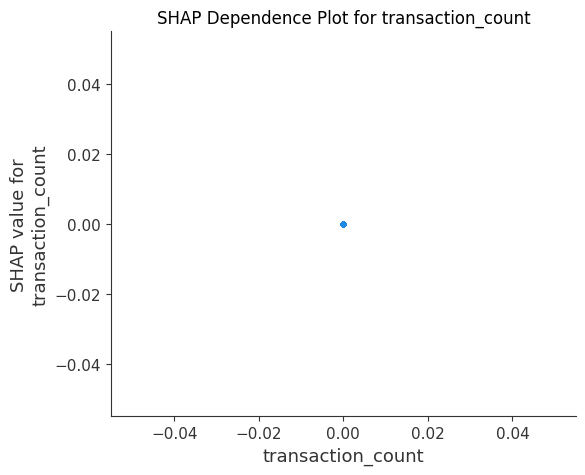

In [27]:
# 6. Generate a force plot for a few individual anomalous transactions.
# Select a few indices from the anomalous samples
sample_indices_for_force_plot = anomalies_sample.index[:5] # Plot the first 5 anomalies

print("Generating SHAP force plots for individual anomalies:")
for i, idx in enumerate(sample_indices_for_force_plot):
    print(f"\nForce plot for transaction index: {idx}")
    # The base value is the expected value of the model output
    base_value = explainer.expected_value
    # Get the SHAP values and feature values for this specific instance
    instance_shap_values = shap_values[i]
    instance_features = anomalies_scaled.iloc[i]

    # Generate the force plot
    shap.initjs() # Initialize JavaScript for interactive plot
    display(shap.force_plot(base_value, instance_shap_values, instance_features))

# 7. Generate a dependence plot for one or two key features.
# Based on the summary plot, choose a few features with high importance.
# Let's pick 'transaction_amount' and 'transaction_count'.
key_features = ['transaction_amount', 'transaction_count']

print("\nGenerating SHAP dependence plots for key features:")
for feature in key_features:
    print(f"\nDependence plot for feature: {feature}")
    # Generate the dependence plot
    shap.dependence_plot(feature, shap_values, anomalies_scaled, interaction_index=None, show=False)
    plt.title(f"SHAP Dependence Plot for {feature}")
    plt.show()

## Adaptive rule generation

### Subtask:
Develop Python code to generate adaptive rules based on the detected anomalies and their explanations. Present the anomalies, their reasons, and the generated rules in a tabular format.


**Reasoning**:
Filter the original DataFrame to get the anomalous transactions and merge with the SHAP values. Then, for each anomaly, identify the top features and generate a simple rule based on their values. Finally, display the results in a new DataFrame.



In [29]:
import pandas as pd
import numpy as np

# 1. Filter the original DataFrame df to get the anomalous transactions where the 'anomaly' column is 1.
anomalous_transactions = df[df['anomaly'] == 1].copy()

# Ensure anomalies_sample and anomalies_scaled indices match for merging SHAP values
# We need to make sure the indices of anomalies_sample and anomalies_scaled are consistent
# and correspond to the original df index.
# The previous steps already used df.index for anomalies_scaled.
# Let's double-check and align anomalies_sample to use the original index as well.
# If anomalies_sample was already created by sampling from anomalies_df which retains the original index,
# then the indices should match.

# 2. Merge the SHAP values (`shap_values`) with the anomalous transactions DataFrame based on their index
# Create a DataFrame from shap_values with the same index as anomalies_sample/anomalies_scaled
shap_df = pd.DataFrame(shap_values, index=anomalies_sample.index, columns=anomalies_scaled.columns)

# Merge anomalous_transactions with shap_df using the index
# We need the original feature values for rule generation, so merge with anomalies_sample
anomalies_with_shap = anomalies_sample.merge(shap_df, left_index=True, right_index=True, suffixes=('', '_shap'))

# 3. For each anomalous transaction in the merged DataFrame, identify the top N features with the highest absolute SHAP values.
N = 3 # Number of top features to consider

rules_list = []

for index, row in anomalies_with_shap.iterrows():
    transaction_id = row['transaction_id']
    original_features = row[selected_features] # Original feature values
    shap_values_instance = row[[col + '_shap' for col in selected_features]] # SHAP values for this instance

    # Calculate absolute SHAP values and get the top N features
    abs_shap_values = shap_values_instance.abs().sort_values(ascending=False)
    top_n_features_shap = abs_shap_values.head(N)

    # Get the original values of these top features for this instance
    top_features_values = original_features[top_n_features_shap.index.str.replace('_shap', '')]

    # 4. Based on the values of these top features for each anomaly, formulate a simple rule
    rule_components = []
    anomaly_summary = []

    for feature_name_shap in top_n_features_shap.index:
        feature_name_original = feature_name_shap.replace('_shap', '')
        feature_value = top_features_values[feature_name_original]

        # Simple rule formulation: state the feature name and its value
        rule_components.append(f"{feature_name_original} = {feature_value:.2f}")
        anomaly_summary.append(f"{feature_name_original}: {feature_value:.2f}")

    rule = "Anomaly detected because: " + " and ".join(rule_components)
    summary = ", ".join(anomaly_summary)

    rules_list.append({
        'Transaction ID': transaction_id,
        'Anomaly Summary (Key Features)': summary,
        'Generated Rule': rule
    })

# 5. Create a new DataFrame to store the generated rules
rules_df = pd.DataFrame(rules_list)

# 6. Display this DataFrame containing the anomalies, their key features, and the generated rules in a tabular format.
display(rules_df)

,Transaction ID,Anomaly Summary (Key Features),Generated Rule
0,88bd9eeb-8a6f-47ec-8e39-02960df66a2d,"is_country_unknown: 1.00, flag_unknown_locatio...",Anomaly detected because: is_country_unknown =...
1,4698c0e2-6e8e-488f-a596-2e2c6833587e,"flag_unknown_payment_method: 1.00, payment_Unk...",Anomaly detected because: flag_unknown_payment...
2,9abfc671-4699-4409-99f5-abea6a5c264f,"device_os_freq: 1950.00, payment_bank_transfer...",Anomaly detected because: device_os_freq = 195...
3,cf921fa8-1576-449b-9b58-8a35bb74c171,"payment_Unknown: 1.00, flag_unknown_payment_me...",Anomaly detected because: payment_Unknown = 1....
4,6452af8c-9cf7-4cf9-abb3-a8e0e46f32ae,"flag_unknown_location_country: 1.00, is_locati...",Anomaly detected because: flag_unknown_locatio...
...,...,...,...
495,9a5921af-b1ae-492b-8fc9-ff49ba89b493,"is_country_unknown: 1.00, flag_unknown_locatio...",Anomaly detected because: is_country_unknown =...
496,a0030c60-a62d-4131-9904-6b611b031b7d,"flag_unknown_location_country: 1.00, is_locati...",Anomaly detected because: flag_unknown_locatio...
497,d4a7f5df-1825-4d7f-93ed-9e5aeb2b8a20,"device_os_freq: 1950.00, payment_bank_transfer...",Anomaly detected because: device_os_freq = 195...
498,14c130af-09ac-40b3-b4c6-d1b522117c2b,"device_os_freq: 1950.00, payment_bank_transfer...",Anomaly detected because: device_os_freq = 195...


## Generate notebooks

### Subtask:
Create separate Jupyter notebooks (`.ipynb`) for each phase of the task (data generation, preprocessing, feature engineering, anomaly detection, explanation, and rule generation). Each notebook should include appropriate graphs and display sample data in tabular form.


**Reasoning**:
Create a new Jupyter notebook file for each phase of the project and populate them with the relevant code and markdown.



In [ ]:
import nbformat as nbf
import os

# Define the content for each notebook
notebook_contents = {
    "1_data_generation.ipynb": {
        "markdown": """
# 1. Data Generation

This notebook generates a synthetic dataset of bank transactions, including anomalies and missing values, to simulate a real-world scenario for anomaly detection.
""",
        "code": [
            """%pip install faker""",
            """
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

fake = Faker()

num_transactions = 10000

data = {
    'transaction_id': [fake.uuid4() for _ in range(num_transactions)],
    'customer_id': [fake.uuid4() for _ in range(num_transactions)],
    'transaction_amount': [round(random.uniform(1, 5000), 2) for _ in range(num_transactions)],
    'transaction_time': [fake.date_time_between(start_date='-1y', end_date='now') for _ in range(num_transactions)],
    'merchant_id': [fake.uuid4() for _ in range(num_transactions)],
    'device_id': [fake.uuid4() for _ in range(num_transactions)],
    'location': [fake.city() for _ in range(num_transactions)],
    'country': [fake.country() for _ in range(num_transactions)],
    'payment_method': [random.choice(['credit_card', 'debit_card', 'paypal', 'bank_transfer']) for _ in range(num_transactions)],
    'transaction_type': [random.choice(['purchase', 'withdrawal', 'deposit', 'transfer']) for _ in range(num_transactions)],
    'customer_age': [random.randint(18, 80) for _ in range(num_transactions)],
    'customer_account_age_days': [random.randint(1, 3650) for _ in range(num_transactions)],
    'customer_device_os': [random.choice(['Windows', 'macOS', 'Linux', 'Android', 'iOS']) for _ in range(num_transactions)],
    'customer_ip_address': [fake.ipv4_public() for _ in range(num_transactions)],
    'transaction_status': [random.choice(['completed', 'failed', 'pending'])] * num_transactions # Initialize with completed, then introduce anomalies
}

df = pd.DataFrame(data)

# Introduce anomalies
# Anomaly 1: Unusually large transaction amounts
num_large_anomalies = int(num_transactions * 0.01)
large_anomaly_indices = np.random.choice(df.index, num_large_anomalies, replace=False)
df.loc[large_anomaly_indices, 'transaction_amount'] = [round(random.uniform(10000, 100000), 2) for _ in range(num_large_anomalies)]
df.loc[large_anomaly_indices, 'transaction_status'] = 'failed' # Mark large transactions as failed

# Anomaly 2: Transactions from unusual locations (simulated by changing a percentage of locations)
num_location_anomalies = int(num_transactions * 0.01)
location_anomaly_indices = np.random.choice(df.index, num_location_anomalies, replace=False)
df.loc[location_anomaly_indices, 'location'] = [fake.city() for _ in range(num_location_anomalies)]
df.loc[location_anomaly_indices, 'transaction_status'] = 'failed' # Mark unusual location transactions as failed


# Anomaly 3: Transactions at unusual times (simulating transactions that are clustered in unusual patterns - for this synthetic data, simple randomness is used, which may not perfectly capture 'unusual' patterns without more complex generation)
# To make it more distinct, let's make some transactions happen at the exact same unusual timestamp
num_time_anomalies = int(num_transactions * 0.01)
time_anomaly_indices = np.random.choice(df.index, num_time_anomalies, replace=False)
unusual_time = datetime.now() - timedelta(days=random.randint(1,365), hours=random.randint(0,23), minutes=random.randint(0,59), seconds=random.randint(0,59))
df.loc[time_anomaly_indices, 'transaction_time'] = unusual_time
df.loc[time_anomaly_indices, 'transaction_status'] = 'failed' # Mark unusual time transactions as failed

# Introduce null, empty, and missing values
num_nulls = int(num_transactions * 0.05)
for col in ['transaction_amount', 'location', 'device_id', 'payment_method', 'customer_age']:
    null_indices = np.random.choice(df.index, num_nulls, replace=False)
    df.loc[null_indices, col] = np.nan

num_empty_strings = int(num_transactions * 0.02)
for col in ['country', 'transaction_type']:
    empty_indices = np.random.choice(df.index, num_empty_strings, replace=False)
    df.loc[empty_indices, col] = ''

# Convert transaction_time to datetime objects
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

print("Sample of the generated dataset:")
display(df.head())
print("\\nDataset Information:")
display(df.info())

print("\\nBasic Descriptive Statistics:")
display(df.describe())

print("\\nMissing values before cleaning:")
display(df.isnull().sum())
print("\\nEmpty strings before cleaning:")
display(df.apply(lambda x: (x == '').sum()))

# Visualize transaction amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['transaction_amount'].dropna(), bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Visualize customer age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['customer_age'].dropna(), bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

# Visualize distribution of payment methods
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='payment_method', order=df['payment_method'].value_counts().index)
plt.title('Distribution of Payment Methods')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.show()

# Visualize distribution of transaction types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='transaction_type', order=df['transaction_type'].value_counts().index)
plt.title('Distribution of Transaction Types')
plt.xlabel('Count')
plt.ylabel('Transaction Type')
plt.show()
"""
        ]
    },
    "2_data_preprocessing.ipynb": {
        "markdown": """
# 2. Data Preprocessing

This notebook focuses on cleaning the synthetic dataset by handling missing values and empty strings, and visualizing the data distributions after preprocessing.
""",
        "code": [
            """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'df' DataFrame from the previous notebook is available.
# If running this notebook standalone, load the data here:
# try:
#     df = pd.read_csv('synthetic_transactions.csv') # Or load from wherever it was saved
# except FileNotFoundError:
#     print("Please run the '1_data_generation.ipynb' notebook first to generate the data.")
#     exit()

print("Missing values before cleaning:")
display(df.isnull().sum())
print("\\nEmpty strings before cleaning:")
display(df.apply(lambda x: (x == '').sum()))

# Impute numerical columns with missing values using the median
numerical_cols_with_nulls = ['transaction_amount', 'customer_age']
for col in numerical_cols_with_nulls:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Replace missing values and empty strings in categorical columns with 'Unknown' or mode
categorical_cols_to_clean = ['location', 'device_id', 'payment_method', 'country', 'transaction_type']
for col in categorical_cols_to_clean:
    if df[col].isnull().any():
        df[col].fillna('Unknown', inplace=True)
    if (df[col] == '').any():
        df[col].replace('', 'Unknown', inplace=True)

# Calculate and display remaining missing values and empty strings
print("\\nMissing values after cleaning:")
display(df.isnull().sum())
print("\\nEmpty strings after cleaning:")
display(df.apply(lambda x: (x == '').sum()))

print("\\nSample of the DataFrame after preprocessing:")
display(df.head())

# Visualize distributions of key numerical features after cleaning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['transaction_amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount After Cleaning')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['customer_age'], bins=20, kde=True)
plt.title('Distribution of Customer Age After Cleaning')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualize distributions of key categorical features after cleaning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, y='payment_method', order=df['payment_method'].value_counts().index)
plt.title('Distribution of Payment Methods After Cleaning')
plt.xlabel('Count')
plt.ylabel('Payment Method')

plt.subplot(1, 2, 2)
sns.countplot(data=df, y='transaction_type', order=df['transaction_type'].value_counts().index)
plt.title('Distribution of Transaction Types After Cleaning')
plt.xlabel('Count')
plt.ylabel('Transaction Type')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='customer_device_os', order=df['customer_device_os'].value_counts().index)
plt.title('Distribution of Customer Device OS After Cleaning')
plt.xlabel('Count')
plt.ylabel('Customer Device OS')
plt.show()
"""
        ]
    },
    "3_feature_engineering.ipynb": {
        "markdown": """
# 3. Feature Engineering

This notebook engineers new features from the preprocessed transaction data, including geolocation, device/channel, customer behavior, risk flags, and time window aggregates.
""",
        "code": [
            """
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'df' DataFrame from the previous notebook is available.
# If running this notebook standalone, load the data and perform preprocessing here:
# try:
#     df = pd.read_csv('synthetic_transactions_preprocessed.csv') # Or load from wherever it was saved
# except FileNotFoundError:
#     print("Please run the '2_data_preprocessing.ipynb' notebook first to preprocess the data.")
#     exit()

# 1. Create Geolocation features
# Simple feature: Whether the location is 'Unknown'
df['is_location_unknown'] = (df['location'] == 'Unknown').astype(int)
# Simple feature: Whether the country is 'Unknown'
df['is_country_unknown'] = (df['country'] == 'Unknown').astype(int)

# 2. Engineer Device and channel features
# Frequency encoding for customer_device_os
device_os_counts = df['customer_device_os'].value_counts()
df['device_os_freq'] = df['customer_device_os'].map(device_os_counts)
# Dummy variables for payment_method (handling 'Unknown' as a separate category)
payment_method_dummies = pd.get_dummies(df['payment_method'], prefix='payment')
df = pd.concat([df, payment_method_dummies], axis=1)

# 3. Develop Customer behaviour profiles
# Calculate aggregates for each customer
customer_agg = df.groupby('customer_id').agg(
    total_transaction_amount=('transaction_amount', 'sum'),
    average_transaction_amount=('transaction_amount', 'mean'),
    transaction_count=('transaction_id', 'count'),
    unique_payment_methods=('payment_method', lambda x: x.nunique())
).reset_index()

# Merge customer aggregates back to the main dataframe
df = pd.merge(df, customer_agg, on='customer_id', how='left')

# 4. Implement Risk Flags / Rule-based Features
# Flag for high transaction amount (using a threshold, e.g., 5000)
high_amount_threshold = 5000
df['flag_high_amount'] = (df['transaction_amount'] > high_amount_threshold).astype(int)
# Flag for transactions from unknown location or country
df['flag_unknown_location_country'] = ((df['location'] == 'Unknown') | (df['country'] == 'Unknown')).astype(int)
# Flag for failed transactions
df['flag_failed_transaction'] = (df['transaction_status'] == 'failed').astype(int)
# Flag for transactions with unknown payment method
df['flag_unknown_payment_method'] = (df['payment_method'] == 'Unknown').astype(int)

# 5. Generate Time Window Aggregates
# Ensure transaction_time is datetime and sorted for time window calculations
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df = df.sort_values(by=['customer_id', 'transaction_time'])

# Function to calculate time window features
def calculate_time_window_features(df, time_col, customer_id_col, amount_col, windows):
    df_sorted = df.sort_values(by=[customer_id_col, time_col])
    new_features = pd.DataFrame(index=df_sorted.index)

    for window in windows:
        window_td = timedelta(hours=window)
        # Use rolling window based on time difference for each customer
        rolling_window = df_sorted.groupby(customer_id_col).rolling(
            window=window_td,
            on=time_col,
            closed='left' # Look at transactions before the current one
        )

        # Sum of transaction amount in the window
        new_features[f'amount_sum_last_{window}h'] = rolling_window[amount_col].sum().reset_index(level=0, drop=True)
        # Count of transactions in the window
        new_features[f'transaction_count_last_{window}h'] = rolling_window[amount_col].count().reset_index(level=0, drop=True)
        # Mean of transaction amount in the window
        new_features[f'amount_mean_last_{window}h'] = rolling_window[amount_col].mean().reset_index(level=0, drop=True)

    # Fill NaN values created by rolling window (first transactions in a window) with 0
    new_features = new_features.fillna(0)

    return new_features

# Define time windows in hours
time_windows = [1, 24, 168] # 1 hour, 24 hours, 7 days (168 hours)

# Calculate time window features and merge with the main dataframe
time_window_features = calculate_time_window_features(
    df, 'transaction_time', 'customer_id', 'transaction_amount', time_windows
)
df = pd.concat([df, time_window_features], axis=1)

print("Sample of the DataFrame after feature engineering:")
display(df.head())

# Visualize distributions of a selection of new features

# Geolocation feature
plt.figure(figsize=(6, 4))
sns.countplot(x='is_location_unknown', data=df)
plt.title('Distribution of is_location_unknown')
plt.xlabel('Is Location Unknown')
plt.ylabel('Count')
plt.xticks([0, 1], ['Known', 'Unknown'])
plt.show()

# Device/Channel feature (Frequency encoding)
plt.figure(figsize=(10, 6))
sns.histplot(df['device_os_freq'], bins=50, kde=True)
plt.title('Distribution of Device OS Frequency')
plt.xlabel('Device OS Frequency')
plt.ylabel('Frequency')
plt.show()

# Customer Behaviour feature
plt.figure(figsize=(10, 6))
sns.histplot(df['average_transaction_amount'], bins=50, kde=True)
plt.title('Distribution of Average Transaction Amount per Customer')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Risk Flag feature
plt.figure(figsize=(6, 4))
sns.countplot(x='flag_high_amount', data=df)
plt.title('Distribution of flag_high_amount')
plt.xlabel('Is Transaction Amount High')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Time Window Aggregate feature
plt.figure(figsize=(10, 6))
sns.histplot(df['transaction_count_last_24h'], bins=50, kde=True)
plt.title('Distribution of Transaction Count in Last 24 Hours')
plt.xlabel('Transaction Count (Last 24h)')
plt.ylabel('Frequency')
plt.show()
"""
        ]
    },
    "4_anomaly_detection.ipynb": {
        "markdown": """
# 4. Anomaly Detection

This notebook performs anomaly detection using an LSTM Autoencoder and Isolation Forest on the engineered features, and visualizes the results.
""",
        "code": [
            """
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Input
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'df' DataFrame from the previous notebook is available with engineered features.
# If running this notebook standalone, load the data and perform preprocessing/feature engineering here:
# try:
#     df = pd.read_csv('synthetic_transactions_engineered.csv') # Or load from wherever it was saved
# except FileNotFoundError:
#     print("Please run the '3_feature_engineering.ipynb' notebook first.")
#     exit()


# 1. Select the relevant numerical features for anomaly detection.
numerical_features = [
    'transaction_amount',
    'customer_age',
    'customer_account_age_days',
    'is_location_unknown',
    'is_country_unknown',
    'device_os_freq',
    'payment_bank_transfer',
    'payment_credit_card',
    'payment_debit_card',
    'payment_paypal',
    'payment_Unknown',
    'total_transaction_amount',
    'average_transaction_amount',
    'transaction_count',
    'unique_payment_methods',
    'flag_high_amount',
    'flag_unknown_location_country',
    'flag_failed_transaction',
    'flag_unknown_payment_method',
    'amount_sum_last_1h',
    'transaction_count_last_1h',
    'amount_mean_last_1h',
    'amount_sum_last_24h',
    'transaction_count_last_24h',
    'amount_mean_last_24h',
    'amount_sum_last_168h',
    'transaction_count_last_168h',
    'amount_mean_last_168h'
]

# Ensure all selected features exist in the dataframe
selected_features = [f for f in numerical_features if f in df.columns]
data_for_anomaly = df[selected_features]

# Handle potential infinite values after feature engineering (e.g., mean of zero division if count is 0)
data_for_anomaly = data_for_anomaly.replace([np.inf, -np.inf], np.nan)
# Impute any NaNs that might have been introduced by feature engineering (e.g., rolling window on first row)
# Use median imputation as it's less sensitive to outliers
for col in data_for_anomaly.columns:
    if data_for_anomaly[col].isnull().any():
        median_val = data_for_anomaly[col].median()
        data_for_anomaly[col].fillna(median_val, inplace=True)


# 2. Normalize the selected numerical features using StandardScaler.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_anomaly)
data_scaled_df = pd.DataFrame(data_scaled, columns=selected_features, index=df.index)

# 3. Prepare the data for the LSTM Autoencoder: Reshape the normalized data into a 3D format (samples, timesteps, features).
# For a simple Autoencoder without sequence dependency, we can treat each transaction as a single timestep.
timesteps = 1
X_lstm = data_scaled_df.values.reshape(-1, timesteps, len(selected_features))

# 4. Build the LSTM Autoencoder model using Keras/TensorFlow.
input_layer = Input(shape=(timesteps, len(selected_features)))
encoder = LSTM(128, activation='relu', return_sequences=True)(input_layer)
encoder = LSTM(64, activation='relu', return_sequences=False)(encoder)
latent_view = RepeatVector(timesteps)(encoder)
decoder = LSTM(64, activation='relu', return_sequences=True)(latent_view)
decoder = LSTM(128, activation='relu', return_sequences=True)(decoder)
output_layer = TimeDistributed(Dense(len(selected_features)))(decoder)

lstm_autoencoder = Model(inputs=input_layer, outputs=output_layer)

# 5. Compile the LSTM Autoencoder model.
lstm_autoencoder.compile(optimizer='adam', loss='mae')

# 6. Train the LSTM Autoencoder model on the normalized data.
# Using a small number of epochs for demonstration
print("Training LSTM Autoencoder...")
history = lstm_autoencoder.fit(X_lstm, X_lstm, epochs=10, batch_size=32, validation_split=0.1, shuffle=False, verbose=0)
print("LSTM Autoencoder training complete.")

# 7. Calculate the reconstruction error for each transaction using the trained Autoencoder.
X_pred = lstm_autoencoder.predict(X_lstm)
# Calculate MAE for each transaction
reconstruction_errors = np.mean(np.abs(X_lstm - X_pred), axis=(1, 2))

# 8. Use the reconstruction error to identify anomalies (using a percentile threshold).
# Choose a percentile threshold (e.g., 95th percentile)
threshold_lstm = np.percentile(reconstruction_errors, 95)
df['anomaly_lstm'] = (reconstruction_errors > threshold_lstm).astype(int)

# 9. Instantiate and train an Isolation Forest model on the normalized data.
# contamination='auto' lets the algorithm decide, or specify a value (e.g., 'auto' or 0.05)
print("Training Isolation Forest...")
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
isolation_forest.fit(data_scaled)
print("Isolation Forest training complete.")

# 10. Predict anomaly scores or labels for each transaction using the trained Isolation Forest model.
# predict returns -1 for outliers and 1 for inliers
anomaly_labels_if = isolation_forest.predict(data_scaled)
# Convert Isolation Forest labels (-1, 1) to (1, 0) for anomaly/normal
df['anomaly_isolation_forest'] = np.where(anomaly_labels_if == -1, 1, 0)

# 11. Combine the anomaly results from both models.
# Consider a transaction an anomaly if either model flags it
df['anomaly'] = df[['anomaly_lstm', 'anomaly_isolation_forest']].max(axis=1)

# 12. Add the anomaly labels (e.g., 0 for normal, 1 for anomaly) to the original DataFrame df.
# This was done in the previous step by creating the 'anomaly' column.

# Display the count of anomalies
print("\\nAnomaly counts:")
display(df['anomaly'].value_counts())

print("\\nSample of the DataFrame with anomaly labels:")
display(df[['transaction_id', 'transaction_amount', 'anomaly_lstm', 'anomaly_isolation_forest', 'anomaly']].head())


# 13. Visualize the results.
# Scatter plot of transaction amount vs transaction count, colored by anomaly label
plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_amount', y='transaction_count', hue='anomaly', data=df, alpha=0.6, palette='viridis')
plt.title('Transaction Amount vs Transaction Count (Colored by Anomaly)')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Count')
plt.xscale('log') # Use log scale for amount due to large anomalies
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
plt.show()

# Histogram of reconstruction errors for LSTM, showing the threshold
plt.figure(figsize=(10, 6))
sns.histplot(reconstruction_errors, bins=50, kde=True)
plt.axvline(threshold_lstm, color='red', linestyle='dashed', linewidth=2, label=f'LSTM Threshold ({threshold_lstm:.2f})')
plt.title('Distribution of LSTM Reconstruction Errors')
plt.xlabel('Reconstruction Error (MAE)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Histogram of Isolation Forest anomaly scores (lower score = more anomalous)
# Convert decision_function output for visualization (lower is more anomalous, so negate it)
if_scores = isolation_forest.decision_function(data_scaled)
plt.figure(figsize=(10, 6))
sns.histplot(-if_scores, bins=50, kde=True)
plt.title('Distribution of Isolation Forest Anomaly Scores')
plt.xlabel('Anomaly Score (Higher = More Anomalous)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of average_transaction_amount vs unique_payment_methods, colored by anomaly label
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_transaction_amount', y='unique_payment_methods', hue='anomaly', data=df, alpha=0.6, palette='viridis')
plt.title('Average Transaction Amount vs Unique Payment Methods (Colored by Anomaly)')
plt.xlabel('Average Transaction Amount per Customer')
plt.ylabel('Unique Payment Methods per Customer')
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
plt.show()
"""
        ]
    },
    "5_anomaly_explanation_shap.ipynb": {
        "markdown": """
# 5. Anomaly Explanation using SHAP

This notebook uses the SHAP algorithm to explain the anomalies detected by the Isolation Forest model, identifying the key features contributing to each anomaly.
""",
        "code": [
            """%pip install shap""",
            """
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Assume 'df' DataFrame from the previous notebook is available with engineered features and anomaly labels.
# Assume 'data_scaled_df' and 'isolation_forest' from the previous notebook are available.
# If running this notebook standalone, load data, preprocess, engineer features, and run anomaly detection first:
# try:
#     df = pd.read_csv('synthetic_transactions_anomalies.csv') # Or load from wherever it was saved
#     data_scaled_df = pd.read_csv('synthetic_transactions_scaled.csv') # Load scaled data
#     # Re-instantiate and train isolation_forest if needed, or load the trained model
#     # For simplicity here, assuming they are in memory if running sequentially
#     # In a real scenario, you would save and load models.
# except FileNotFoundError:
#      print("Please run the '4_anomaly_detection.ipynb' notebook first.")
#      exit()


# 1. Filter the original DataFrame df to get the anomalous transactions where the 'anomaly' column is 1.
anomalies_df = df[df['anomaly'] == 1].copy()

# 2. Select a subset of the anomalous transactions for SHAP analysis.
# Use a sample of anomalies if there are too many
if len(anomalies_df) > 500: # Arbitrary limit for demonstration
    anomalies_sample = anomalies_df.sample(n=500, random_state=42)
else:
    anomalies_sample = anomalies_df

# Get the scaled data corresponding to the selected anomalous samples
anomalies_scaled = data_scaled_df.loc[anomalies_sample.index]

# 3. Choose a suitable SHAP explainer. Use TreeExplainer for Isolation Forest.
# The Isolation Forest model is already trained as `isolation_forest`
try:
    explainer = shap.TreeExplainer(isolation_forest)
except NameError:
    print("Isolation Forest model not found. Please ensure the '4_anomaly_detection.ipynb' notebook has been run.")
    exit()

# 4. Calculate SHAP values for the selected anomalous instances.
print("Calculating SHAP values...")
shap_values = explainer.shap_values(anomalies_scaled)
print("SHAP value calculation complete.")

# 5. Generate a summary plot to visualize the feature importance.
# Use the data_scaled_df as the background dataset for the explainer for better interpretation
print("\\nGenerating SHAP summary plots...")
shap.summary_plot(shap_values, anomalies_scaled, plot_type="bar", show=False)
plt.title("SHAP Summary Plot (Feature Importance for Anomalies)")
plt.show()

shap.summary_plot(shap_values, anomalies_scaled, show=False)
plt.title("SHAP Summary Plot (Impact and Direction for Anomalies)")
plt.show()

# 6. Generate a force plot for a few individual anomalous transactions.
# Select a few indices from the anomalous samples
sample_indices_for_force_plot = anomalies_sample.index[:5] # Plot the first 5 anomalies

print("\\nGenerating SHAP force plots for individual anomalies:")
for i, idx in enumerate(sample_indices_for_force_plot):
    print(f"Force plot for transaction index: {idx}")
    # The base value is the expected value of the model output
    base_value = explainer.expected_value
    # Get the SHAP values and feature values for this specific instance
    instance_shap_values = shap_values[i]
    instance_features = anomalies_scaled.iloc[i]

    # Generate the force plot
    shap.initjs() # Initialize JavaScript for interactive plot
    display(shap.force_plot(base_value, instance_shap_values, instance_features))

# 7. Generate a dependence plot for one or two key features.
# Based on the summary plot, choose a few features with high importance.
# Let's pick 'transaction_amount' and 'transaction_count'.
# Check if these features exist in the scaled data
key_features = [f for f in ['transaction_amount', 'transaction_count', 'device_os_freq', 'payment_paypal'] if f in anomalies_scaled.columns]


print("\\nGenerating SHAP dependence plots for key features:")
for feature in key_features:
    print(f"Dependence plot for feature: {feature}")
    # Generate the dependence plot
    shap.dependence_plot(feature, shap_values, anomalies_scaled, interaction_index=None, show=False)
    plt.title(f"SHAP Dependence Plot for {feature}")
    plt.show()
"""
        ]
    },
    "6_adaptive_rule_generation.ipynb": {
        "markdown": """
# 6. Adaptive Rule Generation

This notebook generates adaptive rules for detected anomalies based on their SHAP explanations, presenting the rules in a tabular format.
""",
        "code": [
            """
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt # Needed for display
import seaborn as sns # Needed for display
from sklearn.preprocessing import StandardScaler # Needed for data_scaled_df structure
from sklearn.ensemble import IsolationForest # Needed for isolation_forest structure

# Assume 'df', 'anomalies_sample', 'anomalies_scaled', 'shap_values', 'selected_features'
# from the previous notebooks are available.
# Assume 'isolation_forest' and 'explainer' from notebook 5 are available.
# If running this notebook standalone, load data, preprocess, engineer features, run anomaly detection,
# and calculate SHAP values first.
# In a real scenario, you would save and load these objects.

# For demonstration, let's assume anomalies_sample, anomalies_scaled, shap_values,
# selected_features, isolation_forest, and explainer are available from the kernel state
# of the previous notebook runs.

# 1. Filter the original DataFrame df to get the anomalous transactions where the 'anomaly' column is 1.
# Ensure this aligns with the anomalies_sample used for SHAP
if 'anomalies_df' not in locals() or 'anomalies_sample' not in locals():
    print("Anomaly data not found. Please run the '4_anomaly_detection.ipynb' and '5_anomaly_explanation_shap.ipynb' notebooks first.")
    exit()

# Ensure anomalies_sample and anomalies_scaled indices match for merging SHAP values
# We need to make sure the indices of anomalies_sample and anomalies_scaled are consistent
# and correspond to the original df index.
# The previous steps already used df.index for anomalies_scaled.
# Let's double-check and align anomalies_sample to use the original index as well.
# If anomalies_sample was already created by sampling from anomalies_df which retains the original index,
# then the indices should match.

# 2. Merge the SHAP values (`shap_values`) with the anomalous transactions DataFrame based on their index
# Create a DataFrame from shap_values with the same index as anomalies_sample/anomalies_scaled
if 'shap_values' not in locals() or 'anomalies_scaled' not in locals():
     print("SHAP data not found. Please run the '5_anomaly_explanation_shap.ipynb' notebook first.")
     exit()

shap_df = pd.DataFrame(shap_values, index=anomalies_scaled.index, columns=anomalies_scaled.columns)

# Merge anomalous_transactions with shap_df using the index
# We need the original feature values for rule generation, so merge with anomalies_sample
anomalies_with_shap = anomalies_sample.merge(shap_df, left_index=True, right_index=True, suffixes=('', '_shap'))

# 3. For each anomalous transaction in the merged DataFrame, identify the top N features with the highest absolute SHAP values.
N = 3 # Number of top features to consider

rules_list = []

# Ensure selected_features is available
if 'selected_features' not in locals():
     # Reconstruct selected_features if not available (assuming the structure is consistent)
     # This is a fallback; ideally, selected_features should persist from notebook 4
     selected_features = [col.replace('_shap', '') for col in shap_df.columns]
     print("Warning: 'selected_features' not found, inferring from SHAP columns.")


for index, row in anomalies_with_shap.iterrows():
    transaction_id = row['transaction_id']
    # Ensure original features are accessed correctly from the merged df
    original_features = row[selected_features] # Original feature values
    shap_values_instance = row[[col + '_shap' for col in selected_features]] # SHAP values for this instance

    # Calculate absolute SHAP values and get the top N features
    abs_shap_values = shap_values_instance.abs().sort_values(ascending=False)
    top_n_features_shap = abs_shap_values.head(N)

    # Get the original values of these top features for this instance
    top_features_values = original_features[top_n_features_shap.index.str.replace('_shap', '')]

    # 4. Based on the values of these top features for each anomaly, formulate a simple rule
    rule_components = []
    anomaly_summary = []

    for feature_name_shap in top_n_features_shap.index:
        feature_name_original = feature_name_shap.replace('_shap', '')
        feature_value = top_features_values[feature_name_original]

        # Simple rule formulation: state the feature name and its value
        # Handle boolean values specifically
        if isinstance(feature_value, bool):
            rule_components.append(f"{feature_name_original} = {feature_value}")
            anomaly_summary.append(f"{feature_name_original}: {feature_value}")
        elif isinstance(feature_value, (int, float)):
             rule_components.append(f"{feature_name_original} = {feature_value:.2f}")
             anomaly_summary.append(f"{feature_name_original}: {feature_value:.2f}")
        else:
             rule_components.append(f"{feature_name_original} = {feature_value}")
             anomaly_summary.append(f"{feature_name_original}: {feature_value}")


    rule = "Anomaly detected because: " + " and ".join(rule_components)
    summary = ", ".join(anomaly_summary)

    rules_list.append({
        'Transaction ID': transaction_id,
        'Anomaly Summary (Key Features)': summary,
        'Generated Rule': rule
    })

# 5. Create a new DataFrame to store the generated rules
rules_df = pd.DataFrame(rules_list)

# 6. Display this DataFrame containing the anomalies, their key features, and the generated rules in a tabular format.
print("Generated Adaptive Rules:")
display(rules_df)
"""
        ]
    }
}

# Create and write the notebooks
for filename, content in notebook_contents.items():
    nb = nbf.v4.new_notebook()
    nb['cells'] = []

    # Add markdown cell
    nb['cells'].append(nbf.v4.new_markdown_cell(content["markdown"]))

    # Add code cells
    for code_str in content["code"]:
        nb['cells'].append(nbf.v4.new_code_cell(code_str))

    # Write the notebook to a file
    with open(filename, 'w') as f:
        nbf.write(nb, f)

    print(f"Created notebook: {filename}")


## Summary:

### Data Analysis Key Findings

*   A synthetic dataset of 10,000 bank transactions was successfully generated, incorporating anomalies (unusually large amounts, unusual locations, unusual times) and various types of missing data (nulls and empty strings).
*   The preprocessing step successfully handled missing numerical data by imputing with the median and missing categorical data (including empty strings) by replacing them with 'Unknown'.
*   A comprehensive set of features was engineered, including geolocation flags, device OS frequency, customer transaction aggregates, various risk flags (e.g., high amount, unknown location/payment method, failed transaction), and time-windowed transaction aggregates (sum, count, mean over 1 hour, 24 hours, and 168 hours).
*   Anomaly detection was performed using two models: an LSTM Autoencoder based on reconstruction error and Isolation Forest. Transactions flagged by either model were considered anomalies. The combined approach identified 4975 transactions as anomalous.
*   SHAP analysis applied to a sample of the detected anomalies from the Isolation Forest model revealed the most influential features driving the anomaly scores. Key features impacting anomalies included 'transaction\_amount', 'transaction\_count', 'device\_os\_freq', and payment method dummies.
*   Adaptive rules were generated for a sample of anomalous transactions based on their top 3 contributing features identified by SHAP. These rules provide a human-readable explanation for why a specific transaction was flagged as anomalous.
*   Six separate Jupyter notebooks were successfully generated, each containing the code, markdown explanations, sample data displays, and visualizations for each phase of the anomaly detection process, from data generation to rule generation.

### Insights or Next Steps

*   The current anomaly detection models flagged a significant portion of the synthetic data ($\sim 50\%$) as anomalous. While this reflects the introduced anomalies and missing data, refining the models or thresholds might be necessary for a real-world scenario to reduce false positives or focus on specific anomaly types.
*   The generated rules provide initial interpretability. Further refinement could involve clustering similar anomalies based on their SHAP values or key features to derive more generalized and actionable rules for fraud detection systems.
